<a href="https://colab.research.google.com/github/Stacy067/NLP-and-Image-Classification-for-Behavioral-Finance/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라벨링

In [ ]:
!pip install -v python-mecab-ko
!pip install konlpy
!pip install JPype1

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

In [ ]:
import codecs

positive = []
negative = []
posneg = []
    
pos = codecs.open("/content/drive/MyDrive/Colab/BehavioralFinance/positive_words_self.txt", 'rb', encoding='UTF-8')

while True:
    line = pos.readline()
    line = line.replace('\n', '')
    positive.append(line)
    posneg.append(line)

    if not line: break        
pos.close()



neg = codecs.open("/content/drive/MyDrive/Colab/BehavioralFinance/negative_words_self.txt", 'rb', encoding='UTF-8')

while True:
    line = neg.readline()
    line = line.replace('\n', '')
    negative.append(line)
    posneg.append(line)
    
    if not line: break
neg.close()

In [ ]:
with open("/content/drive/MyDrive/Colab/BehavioralFinance/negative_words_self.txt", encoding='utf-8') as neg:
  negative = neg.readlines()

negative = [neg.replace("\n", "") for neg in negative]

with open("/content/drive/MyDrive/Colab/BehavioralFinance/positive_words_self.txt", encoding='utf-8') as pos:
  positive = pos.readlines()

negative = [neg.replace("\n", "") for neg in negative]
positive = [pos.replace("\n", "") for pos in positive]

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab/BehavioralFinance/text_all.csv')

In [ ]:
df['headline']

0                            강경화 2차북미정상회담 준비 접촉·소통 진행중으로 안다
1                           이총리 경제정책 부작용 직시…고통 최소화 노력 배가하겠다
2                                 美 상·하원 외교위원장, 하원 군사위원장 교체
3                              강경화 김정은 신년사 매우 긍정적…북미대화동력 강화
4                             기재부 직무상 비밀누설 신재민 前사무관 2일 검찰고발
                                ...                        
235460                        10일, 거래소 외국인 순매수상위에 화학 업종 5종목
235461    10일, 기관 거래소에서 LG전자(+4.04%), KODEX 레버리지(+1.32%)...
235462     10일, 외국인 거래소에서 삼성전자(-1.33%), 현대모비스(+1.84%) 등 순매도
235463                    이인영 새해 더 큰 평화 열고자 노력…북녘 동포들도 건강하길
235464                        변창흠 2·4 공급 대책으로 집값 내릴 수도 있을 것
Name: headline, Length: 235465, dtype: object

In [ ]:
from tqdm import tqdm
import re

labels = []

title_data_1 = list(df['headline'])

for title in tqdm(title_data_1):
  clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', title) 
  negative_flag = False
  label = 0
  for i in range(len(negative)):
    if negative[i] in clean_title:
      label = -1
      negative_flag = True
      print("negative 비교단어 : ", negative[i], "clean_title : ", clean_title) 
      break
  if negative_flag == False:
    for i in range(len(positive)):
      if positive[i] in clean_title:
        label = 1
        print("positive 비교단어 : ", positive[i], "clean_title : ", clean_title)
        break

  labels.append(label)

df['label'] = labels

  0%|          | 494/235465 [00:00<00:47, 4936.37it/s]

negative 비교단어 :  고발 clean_title :  기재부 직무상 비밀누설 신재민 前사무관 2일 검찰고발
negative 비교단어 :  위험 clean_title :  아베 레이더 갈등에 화기관제 레이더 겨냥 위험한 행위 주장
negative 비교단어 :  중단 clean_title :  마크롱 개혁 중단 없다노란 조끼 정면돌파 선언
negative 비교단어 :  사망 clean_title :  쓰나미 이어 산사태까지인니 30가구 파묻혀 15명 사망
positive 비교단어 :  최고 clean_title :  2018 최고 투자는 예술품·와인
negative 비교단어 :  적자 clean_title :  기재부 차관보 靑 강압에 적자국채 발행 지시
positive 비교단어 :  1위 clean_title :  세계 1위 탈환한 조선 빅3올 수주 목표 높인다
positive 비교단어 :  최대 clean_title :  기아차 세단 명가로 변신K시리즈 판매량 역대 최대
positive 비교단어 :  증가 clean_title :  경제 버팀목 수출 급속 둔화작년 반도체 빼면 0대 증가 그쳐
positive 비교단어 :  지원 clean_title :  성윤모 산업부장관 범부처 수출활력 촉진단 만들어 수출기업 지원
positive 비교단어 :  최대 clean_title :  한국GM 주요 차종 가격 인하이쿼녹스 최대 300만원 할인
negative 비교단어 :  하락 clean_title :  자영업자 체감경기 최악작년 역대 최대폭 하락
negative 비교단어 :  논란 clean_title :  勞편향 논란 커지는데사안마다 칼자루 쥔 경사노위
negative 비교단어 :  위험 clean_title :  2019년 금융계 핵심 키워드는 위험 관리
negative 비교단어 :  위반 clean_title :  기막힌 현실전체 급여 중 기본급 비중 40 미만 연봉 5000만원도 최저임금 위반 속출
positive 비교단어 :  기대 clean_tit

  0%|          | 988/235465 [00:00<03:14, 1203.85it/s]

기대 clean_title :  올해 1월 효과 기대하기 어려워
positive 비교단어 :  기대 clean_title :  포스코켐텍 2차 전지 사업 기대감 매수한화
positive 비교단어 :  출시 clean_title :  펄어비스 신작 출시로 성장세 이어갈 것NH
positive 비교단어 :  투자 clean_title :  투자 썰쩐 4 자고 일어나면 상한가월급 모은 돈 200배 불렸다
negative 비교단어 :  소송 clean_title :  셧다운 무급 근무 美 공무원들 트럼프 정부 상대 소송
positive 비교단어 :  주목 clean_title :  2019년 유망 해외증시많이 빠진 신흥국 주목하반기 성과 기대
negative 비교단어 :  비상 clean_title :  셧다운에 美국립공원 쓰레기 비상요세미티 일부 캠프장 폐쇄
positive 비교단어 :  수상 clean_title :  개미 코스닥 매수상위 10종목 중 9개 마이너스 수익
negative 비교단어 :  소송 clean_title :  셧다운 무급 근무 美 연방 공무원들 정부 상대 소송
positive 비교단어 :  주목 clean_title :  김정은 신년사 원자력발전 언급 비핵화 협상서 의미 주목
negative 비교단어 :  문제 clean_title :  신재민 폭로에 입 연 김동연 前 부총리 소신과 정책조율은 다른 문제
negative 비교단어 :  문제 clean_title :  김동연 소신담긴 정책 모두 관철되진 않아조율은 다른 문제
positive 비교단어 :  1위 clean_title :  최근 4년 ROE 개선된 중소형 건설주 1위는 한라
negative 비교단어 :  고발 clean_title :  김태우 박형철 고교 동문에 첩보 누설검찰 고발
positive 비교단어 :  인기 clean_title :  대사 대리 잠적 北대사관 가보니인기척 없이 정적만 휩싸여
negative 비교단어 :  전쟁 clean_title :  문대통령 6·25참전

  1%|          | 1238/235465 [00:01<05:39, 690.61it/s]

clean_title :  한경로보뉴스 평화홀딩스 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 평화홀딩스 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  돌파 clean_title :  北김정은 잇단 친서외교로 교착국면 돌파구 여나
negative 비교단어 :  하락 clean_title :  중국 상하이종합지수 014 하락 출발
negative 비교단어 :  고발 clean_title :  나경원 국채매입 취소 특가법상 국고손실죄 해당고발 검토
positive 비교단어 :  상승 clean_title :  한경로보뉴스 삼기오토모티브 10 이상 상승 주가 60일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 LIG넥스원 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 YG PLUS 5 이상 상승 주가 20일 이평선 상회 단기·중기 이평선 역배열
negative 비교단어 :  하락 clean_title :  위안화 고시환율 달러당 68631위안022 가치 하락
positive 비교단어 :  출시 clean_title :  MG손해보험 다이렉트 애지중지 어린이보험 출시
positive 비교단어 :  상승 clean_title :  한경로보뉴스 CJ헬로 5 이상 상승 주가 반등 시도 단기 이평선 역배열 구간
positive 비교단어 :  투자 clean_title :  소프트뱅크벤처스 소프트뱅크그룹 해외초기 투자 책임진다
positive 비교단어 :  상승 clean_title :  한경로보뉴스 NAVER 5 이상 상승 20183Q 매출액 1398십억164 영업이익 222십억290
positive 비교단어 :  상승 clean_title :  한경로보뉴스 NAVER 5 이상 상승 20183Q 매출액

  1%|          | 1390/235465 [00:01<06:12, 627.94it/s]


positive 비교단어 :  증가 clean_title :  주택담보대출 두달째 4조원대 증가이번엔 집단대출 급증 영향
negative 비교단어 :  우려 clean_title :  필수영양소 부족하고 너무 짜가정간편식 영양 불균형 우려
positive 비교단어 :  최대 clean_title :  단독 한국 최대 게임사 넥슨 中 텐센트에 넘어갈 수도
negative 비교단어 :  매각 clean_title :  단독 김정주 넥슨 판다매각가 10兆 예상
negative 비교단어 :  문제 clean_title :  추궈훙 주한中대사 韓中은 한반도문제 당사국공동이익있다
positive 비교단어 :  지원 clean_title :  기업의 대규모 건설 투자이낙연 총리 조기 착공 지원
positive 비교단어 :  새로운 clean_title :  이총리 새로운 건설사업 발굴·시행조기 착공도 지원
positive 비교단어 :  오픈 clean_title :  몬스터큐브 가상화폐 전용쇼핑몰 비제로샵 오픈
positive 비교단어 :  진출 clean_title :  종합 OTT 플랫폼 진출에 투자자 반색SKT 5거래일 연속 올랐다
negative 비교단어 :  하락 clean_title :  페트병 재료값 하락 수혜삼양패키징 훨훨
negative 비교단어 :  피해 clean_title :  더 이상 못 참아수도권 규제 피해 따져보겠다는 고양시
positive 비교단어 :  기부 clean_title :  수도권만 쏙 빼고 규제자유특구 추진중기부 내달 입법예고 예정
negative 비교단어 :  우려 clean_title :  대법 삼성家 이혼소송 2심재판부 바꿔라불공정 재판 우려
negative 비교단어 :  논란 clean_title :  광화문 대통령 공약 보안·비용 문제로 무산空약 논란도
positive 비교단어 :  신제품 clean_title :  삼성 커브드 게이밍 모니터 등 신제품 CES서 공개
negative 비교단어 :  전쟁 clean_titl

  1%|          | 1630/235465 [00:02<05:59, 650.33it/s]

항의 clean_title :  한국 신재민 제보 진상조사 촉구靑 찾아가 항의서한 전달
positive 비교단어 :  증가 clean_title :  통일부 김정은 작년활동서 경제분야 대폭증가42로 최다
positive 비교단어 :  주목 clean_title :  南천해성北황충성 연락사무소서 협의할 듯신년사 논의 주목
positive 비교단어 :  출시 clean_title :  기업은행 기업고객 대상 IBK 성공의 법칙 예금 출시
negative 비교단어 :  하락 clean_title :  일본 닛케이 오전장 303 하락 마감
negative 비교단어 :  하락 clean_title :  코스피 외국인·개인 팔자에 1990선서 하락 흐름
negative 비교단어 :  해지 clean_title :  상상인저축은행 중도해지 가능 정기예금 가입 1000억원 돌파
positive 비교단어 :  기대 clean_title :  민주 신재민 빠른 회복 기대한국당 정치공세 그만두라
negative 비교단어 :  고발 clean_title :  김태우 2일째 검찰 출석박형철 외 靑 인사 추가고발 안 해
positive 비교단어 :  오픈 clean_title :  가상화폐거래소 후오비 코리아 원화 거래 정식 오픈
positive 비교단어 :  전망 clean_title :  미·중 경기 호시절 갔나세계경제 온통 잿빛 전망뿐
positive 비교단어 :  전망 clean_title :  종목삼성전자 실적 부진 전망애플 쇼크로 신저가저점은 3만6000원
negative 비교단어 :  하락 clean_title :  외환 시황 원·달러 환율 하락11255원22원
positive 비교단어 :  상승 clean_title :  한경로보뉴스 농심홀딩스 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  협상 clean_title :  미중 7∼8일 무역협상비관세장벽·통상불균형 실무교섭
positive 비교단어 :  상승 clean_title :

  1%|          | 1827/235465 [00:02<06:30, 597.65it/s]

적자 clean_title :  한경로보뉴스 메타랩스 5 이상 상승 20183Q 매출액 166억2391 영업이익 7억적자지속
positive 비교단어 :  상승 clean_title :  한경로보뉴스 시큐브 10 이상 상승 주가 상승 중 단기간 골든크로스 형성
negative 비교단어 :  구설수 clean_title :  김동연 아픈 가족사 들추며 소신과 정책 조율은 다른 문제손혜원 신재민 조롱 구설수
negative 비교단어 :  하락 clean_title :  미국 주가 하락에정부 이상징후 발생시 시나리오 따라 적극 대처
positive 비교단어 :  지원 clean_title :  상가정보연구소 열두번째 수익형 부동산 마케팅 지원 설명회 개최
positive 비교단어 :  상승 clean_title :  한경로보뉴스 이엠코리아 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 이엠코리아 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 TIGER 인버스 52주 신고가 경신 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 KODEX 인버스 52주 신고가 경신 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  1위 clean_title :  지난해 매출액 증가율 1위 모바일 광고기업은 퓨쳐스트림네트웍스 비결은
positive 비교단어 :  경신 clean_title :  한경로보뉴스 대영포장 52주 신고가 경신 20183Q 매출액 709억136 영업이익 26억흑자전환
positive 비교단어 :  경신 clean_title :  한경로보뉴스 대영포장 52주 신고가 경신 20183Q 매출액 709억136 영업이익 26억흑자전환
positive 비교단어 :  경신 clean_title :  한경로보뉴스 대영포장

  1%|          | 1940/235465 [00:02<05:49, 667.49it/s]

 협상 clean_title :  국민은행 19년만의 총파업 초읽기협상결렬 후 밤샘집회 돌입
positive 비교단어 :  협상 clean_title :  국민銀 노조 사측과 협상 결렬 선언18년 만에 총파업 강행키로
positive 비교단어 :  협상 clean_title :  KB국민은행 노조위원장 재협상 의지있어밤새워서라도 협상
positive 비교단어 :  최대 clean_title :  테슬라 中공장 착공세계최대 車시장 직접 공략
negative 비교단어 :  한숨 clean_title :  애물단지 돼버린 다가구주택보유세 치솟아 한숨
positive 비교단어 :  부상 clean_title :  北美 2차정상회담 비행거리내 아시아국가 유력시베트남 부상
positive 비교단어 :  최대 clean_title :  수입화장품 가격 또 인상샤넬 최대 103 올려
negative 비교단어 :  피해 clean_title :  KB국민은행 19년 만에 총파업금감원 소비자 피해 모니터링 계획
positive 비교단어 :  출시 clean_title :  바디프랜드 어린이·청소년용 안마의자 출시
positive 비교단어 :  대세 clean_title :  설 선물 올해도 실속형이 대세
positive 비교단어 :  1위 clean_title :  작년 세계 반도체시장 134 성장1위 삼성 인텔과 격차 확대
negative 비교단어 :  문제 clean_title :  문재인 대통령 일자리가 가장 시급중소기업들이 힘내야 문제 해결”
positive 비교단어 :  투자 clean_title :  미국경제학회 노동경제학 석학 데이비드 오터 MIT 교수 프런티어잡 늘리려면 교육과 RD 투자 늘려야”
positive 비교단어 :  상승 clean_title :  감정원 27 vs 감정평가사 13 고무줄 상승률공시價 어떻게 믿고 세금 내나
positive 비교단어 :  최대 clean_title :  靑 비서진 친정체제 강화설 전후 최대 10개 부처 장관 바뀔 듯
po

  1%|          | 2168/235465 [00:02<05:11, 749.72it/s]

 clean_title :  한경로보뉴스 머큐리 52주 신고가 경신 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 머큐리 52주 신고가 경신 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 유니트론텍 10 이상 상승 주가 상승세 단기 이평선 역배열 구간
positive 비교단어 :  상승 clean_title :  일본 닛케이지수 437 상승 마감
positive 비교단어 :  상승 clean_title :  한경로보뉴스 위지윅스튜디오 상한가↑ 도달 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 HDC현대EP 5 이상 상승 20183Q 매출액 2192억78 영업이익 32억769
positive 비교단어 :  상승 clean_title :  한경로보뉴스 하이트진로홀딩스 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 팬엔터테인먼트 10 이상 상승 주가 상승세 단기 이평선 역배열 구간
positive 비교단어 :  상승 clean_title :  한경로보뉴스 넥슨지티 상한가↑ 도달 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  수상 clean_title :  보헤미안 랩소디 골든글로브 2관왕작품상·남우주연상 수상
positive 비교단어 :  상승 clean_title :  한경로보뉴스 갤럭시아에스엠 5 이상 상승 주가 반등으로 5일 이평선 넘어섬 단기 이평선 역배열 구간
positive 비교단어 :  상승 clean_title :  대만 자취안지수 212 상승 마감
positive 비교단어 :  상승 clean_title :  한경로보뉴스 유니온머티리얼 5 이상 상승 주가 20일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  인기 clea

  1%|          | 2257/235465 [00:03<05:19, 729.07it/s]

 中 짝퉁 다이슨 세계 첫 적발지재권 보호 노력 부각
positive 비교단어 :  주목 clean_title :  트럼프 협상교착에도 연일 북미정상회담 강조배경 주목
negative 비교단어 :  하락 clean_title :  외환 시황 원·달러 환율 하락11164원81원
positive 비교단어 :  상승 clean_title :  한경로보뉴스 신풍제지 5 이상 상승 주가 상승세 단기 이평선 역배열 구간
positive 비교단어 :  상승 clean_title :  한경로보뉴스 신대양제지 5 이상 상승 20183Q 매출액 1722억150 영업이익 318억17923
positive 비교단어 :  진출 clean_title :  상아프론테크 강세글로벌 멤브레인 시장 진출
positive 비교단어 :  상승 clean_title :  한경로보뉴스 오이솔루션 52주 신고가 경신 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 오이솔루션 52주 신고가 경신 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한미글로벌 5 이상 상승 주가 상승세 단기 이평선 역배열 구간
positive 비교단어 :  상승 clean_title :  한경로보뉴스 신세계 IC 5 이상 상승 외국인 3일 연속 순매수5869주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 삼성SDI우 5 이상 상승 주가 20일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 NAVER 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
negative 비교단어 :  문제 clean_title :  양승태 배상 확정 땐 국제적으로 문제징용소송 개입 정황
positive 비교단어 :  상승 clean_title :  한경로보뉴스 위지윅스튜디오 10 이상 상승 기관 8일 연속 순매수2

  1%|          | 2449/235465 [00:03<05:10, 750.82it/s]

상승 clean_title :  한경로보뉴스 만호제강 5 이상 상승 주가 상승세 단기 이평선 역배열 구간
negative 비교단어 :  적자 clean_title :  한경로보뉴스 동양철관 5 이상 상승 20183Q 매출액 392억347 영업이익 5억적자지속
negative 비교단어 :  적자 clean_title :  한경로보뉴스 동양철관 5 이상 상승 20183Q 매출액 392억347 영업이익 5억적자지속
negative 비교단어 :  적자 clean_title :  한경로보뉴스 동양철관 5 이상 상승 20183Q 매출액 392억347 영업이익 5억적자지속
negative 비교단어 :  적자 clean_title :  한경로보뉴스 동양철관 5 이상 상승 20183Q 매출액 392억347 영업이익 5억적자지속
negative 비교단어 :  적자 clean_title :  한경로보뉴스 동양철관 5 이상 상승 20183Q 매출액 392억347 영업이익 5억적자지속
negative 비교단어 :  적자 clean_title :  한경로보뉴스 동양철관 5 이상 상승 20183Q 매출액 392억347 영업이익 5억적자지속
positive 비교단어 :  매수 clean_title :  한경로보뉴스 케이탑리츠 52주 신고가 경신 기관 14일 연속 순매수1216주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 티플랙스 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 티플랙스 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 남성 5 이상 상승 주가 상승세 단기 이평선 역배열 구간
positive 비교단어 :  상승 clean_title :  한경로보뉴스 남성 5 이상 상승 주가 상승세 단기 이평선 역배열 구간
positive 비교단어 :  상승 clean_title :  한경로보뉴스

  1%|          | 2718/235465 [00:03<03:58, 975.83it/s]

 clean_title :  경남제약 상장폐지 위기 벗어나최대주주 지분율 개선 관건
negative 비교단어 :  퇴출 clean_title :  정부 에너지효율 낮은 산업용 기기 퇴출 추진
negative 비교단어 :  급감 clean_title :  LG전자도 실적 급감4분기 영업이익 80↓
positive 비교단어 :  지원 clean_title :  신한銀 신보·기보와 일자리창출 기업 등 지원
negative 비교단어 :  불만 clean_title :  기업 10곳 중 9곳 경기 하강국면절반은 경제정책 불만
negative 비교단어 :  반토막 clean_title :  수출 본격 내리막길경상흑자 두달새 반토막
negative 비교단어 :  적자 clean_title :  백광엽의 논점과 관점 박성동·신재민의 적자국채 대첩
negative 비교단어 :  문제 clean_title :  사설 삼성전자 4분기 어닝쇼크 삼성만의 문제 아니다
positive 비교단어 :  지원 clean_title :  산업단지공단 중소기업 청년교통비 지원시스템 새로 구축
positive 비교단어 :  투자 clean_title :  美 윈리조트 주가로 外人 한국 투자 예측
negative 비교단어 :  우려 clean_title :  CES 2019 中 OLED 대규모 투자 韓에 위협정부 지원 앞세워 시장 잠식 우려
positive 비교단어 :  주목 clean_title :  험지 출마냐 통일장관 입각이냐차기행보 주목받는 임종석
negative 비교단어 :  적자 clean_title :  野 3당 적자국채 의혹 규명 기재위 청문회 합의
positive 비교단어 :  지원 clean_title :  靑 총선 출마 안할 사람만 지원해라與 현역의원 입각 설왕설래
negative 비교단어 :  우려 clean_title :  미국 지하철 차량 입찰에 중국 참여 제한사이버 공격 우려
positive 비교단어 :  투자 clean_title :  인구 1억 베트남에 벤처투자·K펍

  1%|▏         | 3000/235465 [00:03<03:25, 1128.86it/s]


negative 비교단어 :  하락 clean_title :  중국 상하이종합지수 오전장 020 하락 마감
positive 비교단어 :  상승 clean_title :  외환 시황 원·달러 환율 상승11247원61원
positive 비교단어 :  주목 clean_title :  靑 떠나는 임종석 차기 행보 주목
negative 비교단어 :  문제 clean_title :  靑행정관·육참총장 만남 공방문제없어 vs 인사문란
positive 비교단어 :  증가 clean_title :  이효리 효과로 연간 제주 관광객 100만명 증가
positive 비교단어 :  상승 clean_title :  한경로보뉴스 화승알앤에이 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 화승알앤에이 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  협상 clean_title :  무역협상 중 김정은 불러 美에 대북 지렛대 과시한 시진핑
positive 비교단어 :  상승 clean_title :  한경로보뉴스 케이씨에스 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 케이씨에스 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 광명전기 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 광명전기 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 광명전기 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  증가 clean_title :  日 용돈·세뱃돈 스마트폰 앱으로 캐시리스 증가
positive 비교단어 :  

  1%|▏         | 3247/235465 [00:03<03:17, 1174.65it/s]

 한경로보뉴스 전일 코스닥 외국인 순매도상위에 제약 업종 5종목
positive 비교단어 :  매도 clean_title :  한경로보뉴스 전일 기관 코스닥에서 셀트리온헬스케어04 에이치엘비135 등 순매도
positive 비교단어 :  매수 clean_title :  한경로보뉴스 전일 외국인 거래소에서 삼성전자347 삼성전기38 등 순매수
negative 비교단어 :  감염 clean_title :  씨젠 이스라엘에 100억원 규모 소화기감염증 검사제품 공급
positive 비교단어 :  최대 clean_title :  오를만한 종목 안보인다지난달 ETF·ETN 비중 역대 최대
positive 비교단어 :  주목 clean_title :  국내증시 상승 제한 전망옵션만기일 앞두고 관련 수급 주목
positive 비교단어 :  기대 clean_title :  카카오 실적 부진하지만카풀 등 신사업 성과에 기대
positive 비교단어 :  기대 clean_title :  한국타이어 지난해 4분기 영업이익 시장기대치 하회 전망목표가↓이베스트
negative 비교단어 :  비상 clean_title :  국민은행 오늘 19년 만에 총파업비상경영체제로 전환
positive 비교단어 :  돌파 clean_title :  GS건설 작년 영업익 1조원 돌파 예상한화
positive 비교단어 :  기대 clean_title :  NAVER 금융 신사업 기대감으로 투자포인트 이동이베스트
negative 비교단어 :  사퇴 clean_title :  임기 3년 남은 김용 세계은행 총재 사퇴 트럼프 때문
positive 비교단어 :  전망 clean_title :  대한항공 4분기 실적 부진 전망유류비 등 비용 이슈유진
positive 비교단어 :  신제품 clean_title :  오리온 아이셔 지난해 매출액 전년比 240 껑충신제품 효과 톡톡
positive 비교단어 :  기대 clean_title :  모닝브리핑 김정은 4차 방중 가능성뉴욕증시 미·중 협상 기대감에 상승
p

  1%|▏         | 3485/235465 [00:04<04:07, 938.18it/s] 


positive 비교단어 :  상승 clean_title :  한경로보뉴스 하이셈 10 이상 상승 최근 3일간 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 금호에이치티 5 이상 상승 주가 반등 시도 단기 이평선 역배열 구간
positive 비교단어 :  수상 clean_title :  미래에셋박현주재단 보건복지부 장관 표창 수상
positive 비교단어 :  체결 clean_title :  유니테스트 161억 규모 반도체 검사장비 계약 체결
positive 비교단어 :  상승 clean_title :  한경로보뉴스 티에이치엔 5 이상 상승 20183Q 매출액 923억312 영업이익 17억851
positive 비교단어 :  상승 clean_title :  한경로보뉴스 티에이치엔 5 이상 상승 20183Q 매출액 923억312 영업이익 17억851
positive 비교단어 :  상승 clean_title :  한경로보뉴스 티에이치엔 5 이상 상승 20183Q 매출액 923억312 영업이익 17억851
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한국테크놀로지 상한가↑ 도달 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 대한유화 5 이상 상승 20183Q 매출액 6450억227 영업이익 876억45
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한솔테크닉스 5 이상 상승 주가 상승 흐름 단기 이평선 정배열 중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 에이디테크놀로지 10 이상 상승 20183Q 매출액 219억1899 영업이익 29억25273
positive 비교단어 :  상승 clean_title :  한경로보뉴스 HDC현대산업개발 5 이상 상승 20183Q 매출액 9395억855 영업이익 1189억511
positive 비교단어 :  상승

  2%|▏         | 3587/235465 [00:04<04:29, 858.86it/s]

positive 비교단어 :  상승 clean_title :  한경로보뉴스 한국내화 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한국내화 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한국내화 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 일진전기 5 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 동국제강 5 이상 상승 Valuation 매력이 낮다  메리츠종금증권 Trading Buy
negative 비교단어 :  적자 clean_title :  한경로보뉴스 나노스 10 이상 상승 20183Q 매출액 152억600 영업이익 1억적자지속
negative 비교단어 :  적자 clean_title :  한경로보뉴스 나노스 10 이상 상승 20183Q 매출액 152억600 영업이익 1억적자지속
positive 비교단어 :  출시 clean_title :  현대해상 퍼펙트플러스종합보험 출시
positive 비교단어 :  기대 clean_title :  청담러닝 강세해외 로열티 수입 증가 기대
positive 비교단어 :  오픈 clean_title :  후오비 코리아 가상화폐 직거래 장터 C2C 거래 플랫폼’ 오픈
positive 비교단어 :  상승 clean_title :  한경로보뉴스 세명전기 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
negative 비교단어 :  하락 clean_title :  위안화 고시환율 달러당 68526위안018 가치 하락
positive 비교단어 :  매수 clean_title :  코스피 외인·기관 매수에 장중 2050선 회복
positive 비교단어 :  협상 clean_title :  미중 

  2%|▏         | 3833/235465 [00:04<04:08, 930.79it/s]

clean_title :  한경로보뉴스 전일 거래소 기관 순매수상위에 전기전자 업종 3종목
positive 비교단어 :  수상 clean_title :  한경로보뉴스 전일 거래소 기관 순매수상위에 전기전자 업종 3종목
positive 비교단어 :  매수 clean_title :  한경로보뉴스 전일 외국인 거래소에서 한국전력396 SK하이닉스085 등 순매수
positive 비교단어 :  전망 clean_title :  DGB금융지주 올해 실적 개선 전망배당주 매력 유효유진
positive 비교단어 :  출시 clean_title :  롯데카드 롯데리조트 기프티샷 출시 기념 이벤트 진행
negative 비교단어 :  전쟁 clean_title :  미중 무역전쟁 불똥올해는 몸 사린 CES 중국기업들
positive 비교단어 :  최고 clean_title :  북한 3월 최고인민회의 대의원 선거김정은 2기 출범
positive 비교단어 :  상승 clean_title :  뉴욕증시 미중 무역협상 타결 낙관세다우 109 상승
positive 비교단어 :  협상 clean_title :  WSJ 김정은 방중 미중 무역협상 中에 지렛대 제공
positive 비교단어 :  투자 clean_title :  바구니에 주식·채권 모두 담을 때투자기간 달리 해야
negative 비교단어 :  혐의 clean_title :  안희정 전 충남지사 비서 성폭행 혐의 항소심 9일 마무리
positive 비교단어 :  협상 clean_title :  모닝브리핑 미중 무역협상 하루 더 연장세계은행 성장률 29 하향
positive 비교단어 :  최고 clean_title :  집코노미TV 보유세 폭탄 남의 일 아니다단독주택 공시가 최고 3배 폭등
positive 비교단어 :  입점 clean_title :  서울시금고 104년 만에 변경신한은행 시청 입점
positive 비교단어 :  상승 clean_title :  뉴욕증시 미·중 무역협상 낙관다우 109 상승 마감
positive 비

  2%|▏         | 4118/235465 [00:04<03:07, 1236.72it/s]

 상승 clean_title :  한경로보뉴스 세미콘라이트 10 이상 상승 주가 20일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 아난티 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 아난티 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 아난티 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 세진중공업 5 이상 상승 20183Q 매출액 617억358 영업이익 35억1029
positive 비교단어 :  상승 clean_title :  한경로보뉴스 엔케이 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 엔케이 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 엔케이 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 엔케이 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  경신 clean_title :  한경로보뉴스 장원테크 52주 신고가 경신 주가 조정 중 단기·중기 이평선 정배열
negative 비교단어 :  하락 clean_title :  한경로보뉴스 오렌지라이프 5 이상 상승 오렌지라이프 주가 하락 관련 코멘트  신한금융투자 
positive 비교단어 :  상승 clean_title :  한경로보뉴스 아이큐어 10 이상 상승 주가 상승 흐름 단기 이평선 정배열 중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 일진다이아

  2%|▏         | 4333/235465 [00:04<02:50, 1356.65it/s]

clean_title :  덱스터 CJ ENM에 매각說에 장중 상한가
positive 비교단어 :  출시 clean_title :  KB운용 한국형 헤지펀드 재출시
negative 비교단어 :  반대 clean_title :  탈원전 반대 서명 20만명 넘었다
positive 비교단어 :  최고 clean_title :  올 경기침체 확률 257년여 만에 최고 비율
positive 비교단어 :  출시 clean_title :  연 수익률 6 후반코람코 임대주택펀드 출시
negative 비교단어 :  싸늘 clean_title :  3기 신도시 악재수도권 외곽 분양시장 싸늘
positive 비교단어 :  제휴 clean_title :  CJ ENM 덱스터 인수설 부인사업 제휴 논의
negative 비교단어 :  중단 clean_title :  미 의류업체 수용소 생산 중국업체와 거래 중단
positive 비교단어 :  유치 clean_title :  베트남 미국에도 2차 북미정상회담 유치의사 전달한 듯
positive 비교단어 :  최대 clean_title :  우리은행 최대주주 우리금융지주로 변경
positive 비교단어 :  최고 clean_title :  대구시세계 최고자율주행 기업 모빌아이와 협력
positive 비교단어 :  최대 clean_title :  우리은행 최대주주 우리금융지주로 변경
negative 비교단어 :  의혹 clean_title :  양승태 소환징용소송 개입의혹 추궁기억 안난다 혐의 부인
negative 비교단어 :  하락 clean_title :  미중 장관급 무역협상 기대원달러 환율 하락 마감
negative 비교단어 :  비상 clean_title :  트럼프 국가비상사태 선포 수순 밟나뜨거워지는 법리공방
positive 비교단어 :  협상 clean_title :  미·중 30∼31일 워싱턴서 고위급 무역협상
positive 비교단어 :  협상 clean_title :  미중 30∼31일 워싱턴서 고위급 무역협상 예정
ne

  2%|▏         | 4574/235465 [00:05<05:08, 748.75it/s]

상승 clean_title :  한경로보뉴스 테이팩스 5 이상 상승 20183Q 매출액 283억40 영업이익 22억281
positive 비교단어 :  상승 clean_title :  한경로보뉴스 테이팩스 5 이상 상승 20183Q 매출액 283억40 영업이익 22억281
positive 비교단어 :  상승 clean_title :  한경로보뉴스 테이팩스 5 이상 상승 20183Q 매출액 283억40 영업이익 22억281
positive 비교단어 :  상승 clean_title :  한경로보뉴스 아진엑스텍 10 이상 상승 20183Q 매출액 51억305 영업이익 6억619
positive 비교단어 :  기대 clean_title :  한경로보뉴스 한화케미칼 5 이상 상승 4분기 실적 기대치를 낮출 것   키움증권 BUYMaintain
negative 비교단어 :  적자 clean_title :  한경로보뉴스 한일진공 10 이상 상승 20183Q 매출액 128억2293 영업이익 5억적자지속
positive 비교단어 :  상승 clean_title :  일본 닛케이 오전장 071 상승 마감
positive 비교단어 :  상승 clean_title :  한경로보뉴스 에프앤리퍼블릭 10 이상 상승 주가 20일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 케이피엠테크 10 이상 상승 전일 종가 기준 PER 36배 PBR 08배 저PER
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한국큐빅 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
negative 비교단어 :  침해 clean_title :  양승태 검찰소환에 민주 사법농단 책임 한국 사법독립 침해
positive 비교단어 :  협상 clean_title :  펜스 부통령 장벽 없인 협상 없다초당파적 대안도 거부
positive 비교단어 :  상승 clean_title :  한경로보뉴스 유니온 5 이상 상승 

  2%|▏         | 4832/235465 [00:05<03:35, 1069.31it/s]

positive 비교단어 :  상승 clean_title :  한경로보뉴스 셀리버리 10 이상 상승 주가 상승 흐름 단기 이평선 정배열 중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 셀리버리 10 이상 상승 주가 상승 흐름 단기 이평선 정배열 중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 하이로닉 15 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  기대 clean_title :  삼천당제약 사흘째 상승바이오시밀러·수출 기대
positive 비교단어 :  상승 clean_title :  한경로보뉴스 동양피엔에프 52주 신고가 경신 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 동양피엔에프 52주 신고가 경신 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 동양피엔에프 52주 신고가 경신 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  기대 clean_title :  엔씨소프트 양호한 실적 기대 반등
positive 비교단어 :  상승 clean_title :  한경로보뉴스 와이아이케이 10 이상 상승 20183Q 매출액 538억729 영업이익 88억2344
positive 비교단어 :  상승 clean_title :  한경로보뉴스 와이아이케이 10 이상 상승 20183Q 매출액 538억729 영업이익 88억2344
positive 비교단어 :  상승 clean_title :  코스피 상승 출발장중 2070선 회복
negative 비교단어 :  불안 clean_title :  1월 1∼10일 수출 75↓ 반도체 27 뚝새해 불안한 첫발
positive 비교단어 :  상승 clean_title :  일본 닛케이지수 066 상승 출발
positive 비교단어 :  상승 clean_t

  2%|▏         | 4975/235465 [00:05<04:16, 897.50it/s] 

 clean_title :  한경로보뉴스 선창산업 5 이상 상승 주가 상승세 단기 이평선 역배열 구간
positive 비교단어 :  주목 clean_title :  정의 노회찬의 창원성산 사수 보선 총력진보 단일화 주목
positive 비교단어 :  상승 clean_title :  외환 시황 원·달러 환율 상승11232원68원
positive 비교단어 :  상승 clean_title :  한경로보뉴스 광주신세계 5 이상 상승 20183Q 매출액 527억43 영업이익 115억04
positive 비교단어 :  체결 clean_title :  내주 브렉시트 대응 韓英 국장급협의FTA 체결 논의
positive 비교단어 :  상승 clean_title :  한경로보뉴스 조광ILI 10 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  제휴 clean_title :  후오비 코리아 국내 주요 가상화폐 커뮤니티와 콘텐츠 제휴
positive 비교단어 :  상승 clean_title :  한경로보뉴스 KCTC 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 KCTC 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 KCTC 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 KCTC 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 KCTC 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 태경산업 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 KCTC 52주 신고가 경신 전형

  2%|▏         | 5094/235465 [00:05<04:06, 934.00it/s]

 한경로보뉴스 이건산업 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 이건산업 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 이건산업 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 이건산업 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 대유위니아 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 대성미생물 10 이상 상승 기관 13일 연속 순매수322주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 대동공업 5 이상 상승 전일 외국인 대량 순매수
negative 비교단어 :  적자 clean_title :  한경로보뉴스 한일사료 10 이상 상승 20183Q 매출액 826억29 영업이익 03억적자지속
positive 비교단어 :  상승 clean_title :  한경로보뉴스 인포뱅크 10 이상 상승 최근 3일간 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한송네오텍 20 이상 상승 주가 반등으로 5일 이평선 넘어섬 단기 이평선 역배열 구간
positive 비교단어 :  상승 clean_title :  한경로보뉴스 유유제약 10 이상 상승 20183Q 매출액 194억80 영업이익 6억569
positive 비교단어 :  상승 clean_title :  한경로보뉴스 케이티스 15 이상 상승 20183Q 매출액 1120억39 영업이익 29억267
positive 비교단어 :  상승 clean_title :  한경로보뉴스 큐로컴 15 이상 상승 최근 5일간 외국인 대량 순매수
ne

  2%|▏         | 5311/235465 [00:06<03:51, 995.31it/s]

 clean_title :  하나금융 유방암 환자에 기부금 전달
positive 비교단어 :  전망 clean_title :  정의용 한미 방위비협상 금명간 합리적 수준 타결 전망
negative 비교단어 :  의혹 clean_title :  추혜선 금감원 포스코건설 감리 착수회계의혹 밝혀져야
negative 비교단어 :  문제 clean_title :  제품안전경영 책 낸 정용수 소비자문제연구원장
positive 비교단어 :  매수 clean_title :  마감프로그램 2406억 매수 우위
positive 비교단어 :  매수 clean_title :  마감코스피 기관 2912억 매수 우위
positive 비교단어 :  매수 clean_title :  마감코스피 외국인 1208억 순매수
positive 비교단어 :  매수 clean_title :  코스피 외인·기관 매수에 2090대 회복코스닥은 690선
positive 비교단어 :  상승 clean_title :  마감코스피 3266p 상승 209718
positive 비교단어 :  기대 clean_title :  중국 경기부양 기대감에 아시아 증시 회복
negative 비교단어 :  하락 clean_title :  환율마감원·달러 환율 하락 마감11207원23원
positive 비교단어 :  기대 clean_title :  상장예정기업이노테라피 체내용 지혈제 유럽 허가로 빅점프 기대
positive 비교단어 :  상승 clean_title :  한경로보뉴스 서흥 5 이상 상승 외국인 4일 연속 순매수12만주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 CS홀딩스 5 이상 상승 20183Q 매출액 301억02 영업이익 31억294
positive 비교단어 :  협상 clean_title :  외교부 북미접촉 이뤄지는 상황후속협상 확정시 발표될것
positive 비교단어 :  상승 clean_title :  한경로보뉴스 STX 상한가↑ 도달 주가 상승 중 단기간 골든크로스 형성


  2%|▏         | 5581/235465 [00:06<04:19, 886.44it/s]

clean_title :  한경로보뉴스 동양네트웍스 5 이상 상승 전일 외국인 대량 순매수
negative 비교단어 :  하락 clean_title :  외환 시황 원·달러 환율 하락11202원28원
positive 비교단어 :  상승 clean_title :  한경로보뉴스 현대차 5 이상 상승 20183Q 매출액 24434십억10 영업이익 289십억760
positive 비교단어 :  상승 clean_title :  한경로보뉴스 LG이노텍 5 이상 상승 20183Q 매출액 2313십억294 영업이익 130십억1319
positive 비교단어 :  상승 clean_title :  한경로보뉴스 LG이노텍 5 이상 상승 20183Q 매출액 2313십억294 영업이익 130십억1319
positive 비교단어 :  상승 clean_title :  한경로보뉴스 인산가 10 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 NH투자증권 5 이상 상승 진격의 IB

  유안타증권 BUY
positive 비교단어 :  상승 clean_title :  한경로보뉴스 세우글로벌 5 이상 상승 기관 8일 연속 순매수405주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 효성 5 이상 상승 기관 6일 연속 순매수97만주
positive 비교단어 :  상승 clean_title :  중국 상하이종합지수 오전장 096 상승 마감
positive 비교단어 :  매수 clean_title :  한경로보뉴스 동양피엔에프 52주 신고가 경신 기관 8일 연속 순매수15만주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 성문전자 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 성문전자 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :

  2%|▏         | 5859/235465 [00:06<03:44, 1023.53it/s]

 마켓인사이트 후드티 입은 최종구핀테크 펀드 투자 본격 확대
positive 비교단어 :  최대 clean_title :  마켓인사이트 케이스톤 에스아이에스 최대주주에
negative 비교단어 :  우려 clean_title :  마켓인사이트 잇단 BW에 짓눌린 금호전기 대규모 주식전환 가능성 우려
positive 비교단어 :  투자 clean_title :  미래에셋네이버 인도네시아 업체에 투자
negative 비교단어 :  반대 clean_title :  황교안 정계진출 반대 50찬성은 37
negative 비교단어 :  리스크 clean_title :  美 신용 사이클 꺾였다대형 은행들 침체 대비 리스크 관리 돌입
positive 비교단어 :  전망 clean_title :  미국 ULI 2019 글로벌 부동산시장 전망 보고서 발표
negative 비교단어 :  의혹 clean_title :  민주당 손혜원 목포 투기·서영교 재판청탁 의혹 진상조사
positive 비교단어 :  최대 clean_title :  넷플릭스 12년 만에 최대 폭 요금 인상
positive 비교단어 :  협상 clean_title :  류허 中부총리 이달 말 訪美美와 무역협상 담판
negative 비교단어 :  최악 clean_title :  사설 최악 치닫는 韓日 관계 경제 부메랑 돼 돌아오고 있다
negative 비교단어 :  횡령 clean_title :  15억 횡령 혐의 설범 대한방직 회장 대법원서 파기환송
negative 비교단어 :  사망 clean_title :  케냐서 총격·폭탄 테러최소 14명 사망
negative 비교단어 :  갑질 clean_title :  산업부 구글·애플 갑질 막기 위해 국제공조 추진
negative 비교단어 :  과징금 clean_title :  공정위 연비 과장광고 닛산에 과징금 9억 부과
negative 비교단어 :  적자 clean_title :  작년 車보험서 7000억 적자보험료 추가 인상은 신중해야
negative 비교단어 :

  3%|▎         | 6070/235465 [00:06<03:35, 1065.02it/s]

코스피 상승 출발2090대 혼조세
negative 비교단어 :  하락 clean_title :  중국 상하이종합지수 005 하락 출발
negative 비교단어 :  하락 clean_title :  중국 상하이종합지수 005 하락 출발
negative 비교단어 :  하락 clean_title :  중국 상하이종합지수 005 하락 출발
positive 비교단어 :  상승 clean_title :  한경로보뉴스 태경산업 5 이상 상승 기관 4일 연속 순매수20만주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한미글로벌 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한미글로벌 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  주목 clean_title :  中매체 한·일 F35 배치 주목젠20이 우월해
negative 비교단어 :  하락 clean_title :  위안화 고시환율 달러당 67615위안011 가치 하락
positive 비교단어 :  지원 clean_title :  최종구 올해가 핀테크 산업 골든타임집중 지원 약속
positive 비교단어 :  상승 clean_title :  한경로보뉴스 신송홀딩스 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 신송홀딩스 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 토박스코리아 52주 신고가 경신 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 토박스코리아 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 토박스코리아 10 이상 상승 전형적인 상승세 단기·중기

  3%|▎         | 6301/235465 [00:07<03:31, 1085.99it/s]

 상승 clean_title :  한경로보뉴스 대유 10 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 대성산업 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 액트로 10 이상 상승 20183Q 매출액 190억276 영업이익 28억479
positive 비교단어 :  상승 clean_title :  한경로보뉴스 정원엔시스 10 이상 상승 주가 60일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  매수 clean_title :  한경로보뉴스 멀티캠퍼스 52주 신고가 경신 외국인 3일 연속 순매수2497주
negative 비교단어 :  우려 clean_title :  트럼프 작년 나토 탈퇴 의사 여러 번 밝혀참모진 우려
positive 비교단어 :  상승 clean_title :  한경로보뉴스 삼강엠앤티 10 이상 상승 전일 종가 기준 PER 12배 PBR 05배 저PER 저PBR
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한라 5 이상 상승 외국인 기관 각각 4일 6일 연속 순매수
negative 비교단어 :  적자 clean_title :  한경로보뉴스 화텍파워 10 이상 상승 20183Q 매출액 72억530 영업이익 33억적자지속
positive 비교단어 :  기대 clean_title :  NHN한국사이버결제 실적 기대감에 엿새째 상승
positive 비교단어 :  상승 clean_title :  한경로보뉴스 코오롱글로벌 5 이상 상승 세운4구역 도시환경정비사업 건설공사 48106억원 매출액대비 1317
positive 비교단어 :  상승 clean_title :  한경로보뉴스 신원 10 이상 상승 전일 기관 대량 순매수
positive 비교단어 :  매수 clean_title :  한경로보뉴스 동양피엔에프 52주 신고가 경신 전일 외국인 대량 

  3%|▎         | 6503/235465 [00:07<03:40, 1038.27it/s]

 상승 clean_title :  한경로보뉴스 한프 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한프 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한프 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  대만 자취안지수 024 상승 마감
negative 비교단어 :  하락 clean_title :  뚝뚝 떨어지는 서울 아파트값10주 연속 하락세
positive 비교단어 :  1위 clean_title :  신한은행 베트남 1위 SNS 잘로와 디지털 대출상품 공동개발
positive 비교단어 :  출시 clean_title :  알레르망 프리미엄 롤업 토퍼와 3단 접이식 토퍼 출시
positive 비교단어 :  매수 clean_title :  한경로보뉴스 덕양산업 상한가↑ 도달 전일 외국인 대량 순매수
positive 비교단어 :  매도 clean_title :  한국증권금융 개인 공매도 접근성 개선대주 재원 확충
positive 비교단어 :  상승 clean_title :  한경로보뉴스 ST모티브 5 이상 상승 EVFCEV용 구동모터 수요 급증   이베스트투자증권 Buy maintain
positive 비교단어 :  상승 clean_title :  한경로보뉴스 덕양산업 5 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 에스코넥 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
negative 비교단어 :  중단 clean_title :  카카오 카풀 18일 오후부터 잠정 중단
positive 비교단어 :  진출 clean_title :  비트코인↔유로화 교환까지가상화폐 거래소 바이낸스 유럽진출
positive 비교단어 :  최대 clean_title 

  3%|▎         | 6682/235465 [00:07<04:17, 886.97it/s] 

clean_title :  10년만의 수익률 국민연금 국내채권 ↓ 해외·대체투자 ↑
positive 비교단어 :  투자 clean_title :  홍종학 올해 4조원 벤처투자 더 늘리겠다한국판 중관춘 검토
positive 비교단어 :  전망 clean_title :  신흥국 채권시장 2월 이후 강세 전망
positive 비교단어 :  상승 clean_title :  뉴욕증시 골드만 등 은행 호실적 환호다우 059 상승 마감
negative 비교단어 :  갑질 clean_title :  농어촌공사의 갑질침수피해 배상 요구에 법대로 하라
positive 비교단어 :  상승 clean_title :  모닝브리핑英 메이 총리 정부 불신임 투표서 승리美증시 은행 호실적에 상승
negative 비교단어 :  기소 clean_title :  美당국 화웨이 기술탈취 혐의 수사곧 기소
positive 비교단어 :  협상 clean_title :  외교부 한·미 북핵협상 수석대표 전화협의했다조속히 만날 것
positive 비교단어 :  협상 clean_title :  투트랙 협상 나선 北·美정상회담 일정·장소 협의할 듯
positive 비교단어 :  협상 clean_title :  美스웨덴서 북미투트랙협상정상회담 일정·의제 동시협의
positive 비교단어 :  전망 clean_title :  北美 첫 실무협상 착수주말 최선희비건 협상 전망
positive 비교단어 :  투자 clean_title :  印 바이어 韓 차부품·화장품에 눈독내륙 거점서 투자상담
negative 비교단어 :  위반 clean_title :  고노 日외무상 韓에 청구권협정 위반상태 조기 시정 촉구할 것
negative 비교단어 :  비상 clean_title :  스타벅스 저금통 대란남편의 비상금이 만들었다고
negative 비교단어 :  전쟁 clean_title :  글로벌 무역전쟁 와중 통상본부 간부 줄사표
positive 비교단어 :  착한 clean_title :  김영철 워싱턴 도착한 날트럼

  3%|▎         | 6934/235465 [00:07<03:49, 995.56it/s]

positive 비교단어 :  상승 clean_title :  한경로보뉴스 서연이화 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  매수 clean_title :  한경로보뉴스 에이치시티 52주 신고가 경신 기관 4일 연속 순매수119만주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 덕성 5 이상 상승 최근 5일간 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 파워로직스 10 이상 상승 4Q18 사상 최대 실적 1Q19 더 사상 최대 실적 예상   이베스트투자증권 NR
positive 비교단어 :  최대 clean_title :  닛산 승합차·트럭 판매부진에 美공장 최대 700명 감원
negative 비교단어 :  의혹 clean_title :  손혜원 투기 의혹에 조합·건설사·SBS도 함께라면 검찰수사 요청하겠다
positive 비교단어 :  상승 clean_title :  한경로보뉴스 키위미디어그룹 5 이상 상승 외국인 8일 연속 순매수1251만주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 에이프로젠 KIC 5 이상 상승 주가 5일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 에이프로젠 KIC 5 이상 상승 주가 5일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 에이프로젠 KIC 5 이상 상승 주가 5일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 에이프로젠 KIC 5 이상 상승 주가 5일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  최대 clean_title :  신영증권 ELS 3종 판매연 최대 54 금리
positive 비교단어 :  1위 clean_title :  지난해 영업이익 

  3%|▎         | 7258/235465 [00:08<03:52, 982.24it/s]

 원·달러 환율 하락 출발11216원09원
positive 비교단어 :  주목 clean_title :  로이터 김정은 설연휴 이후 베트남 방문북미회담 개최 주목
negative 비교단어 :  매각 clean_title :  스펙트럼 7개 제품 매각한미약품에 긍정적
positive 비교단어 :  편한 clean_title :  와글와글  이사 왔나 보네 전세야 매매야 주민들의 불편한 관심
negative 비교단어 :  의혹 clean_title :  손혜원 의원 국립박물관 인사 압력 의혹도 제기돼
negative 비교단어 :  피해 clean_title :  외교부 콜롬비아 테러로 확인된 우리 국민 피해 없어
positive 비교단어 :  매도 clean_title :  한경로보뉴스 전일 기관 코스닥에서 와이지엔터테인먼트609 셀트리온헬스케어377 등 순매도
positive 비교단어 :  매도 clean_title :  한경로보뉴스 전일 기관 거래소에서 삼성전자121 삼성전자우189 등 순매도
positive 비교단어 :  매도 clean_title :  한경로보뉴스 전일 외국인 거래소에서 셀트리온322 삼성전기25 등 순매도
positive 비교단어 :  매수 clean_title :  한경로보뉴스 전일 기관 거래소에서 KODEX 레버리지045 현대모비스35 등 순매수
positive 비교단어 :  매도 clean_title :  한경로보뉴스 전일 코스닥 외국인 순매도상위에 오락·문화 업종 3종목
positive 비교단어 :  매도 clean_title :  한경로보뉴스 전일 코스닥 외국인 순매도상위에 오락·문화 업종 3종목
positive 비교단어 :  매도 clean_title :  한경로보뉴스 전일 코스닥 외국인 순매도상위에 오락·문화 업종 3종목
positive 비교단어 :  매수 clean_title :  한경로보뉴스 전일 기관 코스닥에서 서울반도체323 다산네트웍스126 등 순매수
positive 비교단어 :  수상 clean_title :  한경

  3%|▎         | 7582/235465 [00:08<02:54, 1307.35it/s]

한경로보뉴스 삼성제약 5 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 웅진에너지 5 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  외환 시황 원·달러 환율 상승11274원55원
negative 비교단어 :  의혹 clean_title :  평화 손혜원 부동산 투기 의혹 국정조사 추진키로
negative 비교단어 :  의혹 clean_title :  靑 손혜원 前보좌관 문대통령 사저 매입 의혹 대응 가치 없어
negative 비교단어 :  고발 clean_title :  검찰 직권남용·비밀누설 고발 손혜원 수사 착수
positive 비교단어 :  주목 clean_title :  커지는 광화문광장 교통수요 조정이 관건GTX역 신설비용 주목
negative 비교단어 :  문제 clean_title :  행안위 오후 조해주 인사청문 문제 논의하나 청문회 합의 난망
positive 비교단어 :  상승 clean_title :  중국 상하이종합지수 오전장 068 상승 마감
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한국프랜지 5 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 DSR제강 5 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  투자 clean_title :  금융상품 잔고 5000만원만 있으면 전문투자자 된다혜택은
positive 비교단어 :  상승 clean_title :  한경로보뉴스 디케이락 10 이상 상승 20183Q 매출액 143억48 영업이익 20억4667
negative 비교단어 :  비판 clean_title :  탈당한 손혜원 빙상계 적폐 비판 앞장전명규 수사해야
positive 비교단어 :  지원 clean_title :  민주 일부 의원들 손혜원 개별지원지도부는 거리 두기
positive 

  3%|▎         | 7859/235465 [00:08<03:17, 1151.41it/s]

 clean_title :  기관투자가에 미운털 박힌 엔터株 왜
positive 비교단어 :  지원 clean_title :  이계문 위원장 대구·서대구 서민금융통합지원센터 현장 방문
positive 비교단어 :  기부 clean_title :  김학도 중기부 차관 대전중앙시장 방문전통시장 이용 캠페인 전개
positive 비교단어 :  투자 clean_title :  마켓인사이트 반도체 호황에 베팅한 JKL원방테크 투자로 3배 수익
positive 비교단어 :  상승 clean_title :  영상효과업체 위지윅스튜디오 공격적 사업 확장에 상승세
negative 비교단어 :  논란 clean_title :  사설 투기·청탁 논란만 있고 공직자 윤리 반성은 왜 없나
negative 비교단어 :  호소 clean_title :  사설 과잉 복지로 재정파탄 호소를 미봉책으로 덮어선 안 된다
positive 비교단어 :  매도 clean_title :  공매도 단골이던 한샘 턴어라운드 본격화
negative 비교단어 :  매각 clean_title :  페르노리카코리아 위스키 임페리얼 판권 매각
positive 비교단어 :  투자 clean_title :  기보 우수기업 정보 VC에 공개해 투자 유도
positive 비교단어 :  불티 clean_title :  키 크는 안마의자 불티바디프랜드 하루 사상최대 매출
positive 비교단어 :  기부 clean_title :  중기부 올 RD 사업에 1조744억 투입한다
negative 비교단어 :  우려 clean_title :  경북·경남·강원 19곳 미분양 우려 지역
positive 비교단어 :  출시 clean_title :  새로 나왔어요 귀뚜라미 친환경 난방기기 출시
negative 비교단어 :  갑질 clean_title :  물류센터→매장 운송비 받는 게 갑질롯데마트 과징금 논란에 유통업계 긴장
negative 비교단어 :  위험 clean_title :  中 28년 만의 최저 성장률 발표한 날시진핑 중

  3%|▎         | 7979/235465 [00:08<04:04, 928.69it/s] 

비판 clean_title :  야 4당 與 선거제 개혁안 비판정개특위 1소위 빈손 종료
positive 비교단어 :  상승 clean_title :  한경로보뉴스 세화피앤씨 10 이상 상승 주가 상승 흐름 단기 이평선 정배열 중기 이평선 역배열
positive 비교단어 :  투자 clean_title :  트럼프 감세에 작년 글로벌 외국인직접투자 19 감소
positive 비교단어 :  최대 clean_title :  日언론 전직 靑관리 인용 北에 우라늄 농축시설 최대 10개소
negative 비교단어 :  사퇴 clean_title :  한국당 산업부 추가 블랙리스트4개 공공기관장 사퇴압박
negative 비교단어 :  위험 clean_title :  시진핑 28년만의 최저 성장률 발표한 날 중대위험 경고
negative 비교단어 :  하락 clean_title :  중국 상하이종합지수 오전장 073 하락 마감
positive 비교단어 :  상승 clean_title :  한경로보뉴스 디에스티 15 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 진흥기업 5 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 진흥기업 5 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 에코캡 10 이상 상승 전일 외국인 대량 순매수
negative 비교단어 :  하락 clean_title :  올림픽·KTX 개통 호재 끝공급과잉에 강원 주택시장 하락세
negative 비교단어 :  반대 clean_title :  시민단체 음성 LNG 발전소 건설 반대
negative 비교단어 :  고발 clean_title :  재판기록 통째로 증발했다 中 최고법원 내부고발 일파만파
negative 비교단어 :  하락 clean_title :  일본 닛케이 오전장 006

  4%|▎         | 8255/235465 [00:08<03:15, 1161.97it/s]

clean_title :  한달 넘긴 美셧다운세금신고·저소득층 복지 차질 우려
negative 비교단어 :  의혹 clean_title :  이총리 손혜원 의혹에 잘못 확인되면 법대로 대처
positive 비교단어 :  기대 clean_title :  카카오 올해 신사업성과 가시화로 수익기여 기대케이프
positive 비교단어 :  전망 clean_title :  GS홈쇼핑 4분기 실적 무난할 전망신영
positive 비교단어 :  기대 clean_title :  LS전선아시아 외형 성장에 따른 영업이익률 개선 기대신한
positive 비교단어 :  투자 clean_title :  코스닥 메자닌 투자 후유증 불가피
positive 비교단어 :  전망 clean_title :  중국 올해 연간 GDP 62 전망연착륙 무게
positive 비교단어 :  전망 clean_title :  서울반도체 올해 영업이익 증가 전망목표가↑하나
positive 비교단어 :  협상 clean_title :  국내증시 반등 지속 조건미중 무역협상 타결·약달러
negative 비교단어 :  하락 clean_title :  한국 증시 브렉시트·경기둔화 우려에 하락 전망
positive 비교단어 :  기대 clean_title :  엔씨소프트 리니지M 굳건점진적 성장 기대키움
negative 비교단어 :  빨간불 clean_title :  미분양 빨간불 반년만에 16곳→19곳수도권 줄고 지방은 확산
negative 비교단어 :  급감 clean_title :  美 세탁기 세이프가드 1년수출은 급감·점유율은 탄탄
negative 비교단어 :  하락 clean_title :  유가 하락 여파지난달 생산자물가 3개월째 하락
negative 비교단어 :  위험 clean_title :  IMF 석달 만에 성장전망 37→35 또내려급격 경기둔화 위험
positive 비교단어 :  협상 clean_title :  北·美 3일간 합숙담판 벌인 첫 실무협상 종료건설적
positive 비교단어 :  협

  4%|▎         | 8379/235465 [00:09<03:22, 1120.56it/s]

positive 비교단어 :  유치 clean_title :  다바타 히로시 비자발급 완화·免稅 확대내년 방문객 4000만명 유치
positive 비교단어 :  투자 clean_title :  마켓인사이트 김수이 대표 한국 포함 아시아 투자 비중 40까지 늘릴 것
positive 비교단어 :  진화 clean_title :  미마모리 산업의 진화치매노인 쓰러지면 손목 밴드가 119 호출
positive 비교단어 :  출시 clean_title :  영화 1편 1초에 저장삼성전자 속도 30 높인 SSD 출시
negative 비교단어 :  급락 clean_title :  압구정 현대 5억원 급락초급매·급급매만 입질
positive 비교단어 :  편한 clean_title :  엠디엠 e편한세상광진그랜드파크 분양
positive 비교단어 :  1위 clean_title :  최근 5년간 배당금 증가율 1위 제약주는 보령제약
positive 비교단어 :  투자 clean_title :  손혜원 법적 자문 받았나 투자 이익 생긴다면 사과 기자회견서 한 발 물러서
positive 비교단어 :  투자 clean_title :  개발 호재 맞춰 투자빠져나올 시기도 고려를
negative 비교단어 :  항의 clean_title :  국방부 오후 5시께 주한일본무관 불러 위협비행 항의
negative 비교단어 :  항의 clean_title :  軍 日초계기 韓군함 540m거리 위협비행日무관 초치·항의
positive 비교단어 :  편한 clean_title :  e편한세상 계양 더 프리미어 3기 신도시 인근 새 아파트
positive 비교단어 :  제휴 clean_title :  SC제일은행 이베이코리아와 제휴G마켓 결제 때 할인
positive 비교단어 :  기대 clean_title :  건대하이뷰 어린이대공원역까지 도보 1분성수 IT밸리 직장인 수요 기대
positive 비교단어 :  출시 clean_title :  새마을금고 아동적금 출시 43일만에 10만건 판매
n

  4%|▎         | 8553/235465 [00:09<03:41, 1024.56it/s]

 clean_title :  중국 상하이종합지수 017 하락 출발
positive 비교단어 :  매수 clean_title :  한경로보뉴스 에스엔피월드 52주 신고가 경신 전일 외국인 대량 순매수
positive 비교단어 :  지원 clean_title :  네이버 지원받은 중소상공인 온라인 매출 작년 2470억
negative 비교단어 :  최악 clean_title :  이해찬 경제성장률 최악 상황 아냐4분기 소비 증가 긍정적
positive 비교단어 :  상승 clean_title :  한경로보뉴스 코리아나 10 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 씨티케이코스메틱스 10 이상 상승 외국인 3일 연속 순매수3581주
positive 비교단어 :  기대 clean_title :  3월부터 주택연금 월수령액 15↓기대수명·금리 영향
negative 비교단어 :  반대 clean_title :  단독주택 공시가격 인상 찬성 470 vs 반대 332
negative 비교단어 :  하락 clean_title :  위안화 고시환율 달러당 67969위안017 가치 하락
positive 비교단어 :  상승 clean_title :  한경로보뉴스 웅진씽크빅 5 이상 상승 전일 종가 기준 PER 40배 PBR 03배 저PER 저PBR
positive 비교단어 :  상승 clean_title :  한경로보뉴스 코스맥스비티아이 5 이상 상승 20183Q 매출액 1137억469 영업이익 62억923
positive 비교단어 :  상승 clean_title :  한경로보뉴스 제닉 10 이상 상승 외국인 3일 연속 순매수2509주
positive 비교단어 :  출시 clean_title :  카카오뱅크 근로자 대상 사잇돌대출 출시
negative 비교단어 :  하락 clean_title :  일본 닛케이지수 082 하락 출발
positive 비교단어 :  최고 clean_title :  선관위 

  4%|▍         | 9101/235465 [00:09<03:07, 1210.41it/s]

clean_title :  충북 최고가 단독주택 공시가격 1년 새 겨우 500만원 상승
positive 비교단어 :  투자 clean_title :  한국동서발전 亞기업 최초 지속가능채권 발행 성공해외 투자자 잇단 러브콜
positive 비교단어 :  투자 clean_title :  한국금융지주 한국투자캐피탈에 1300억원 규모 채무보증 결정
negative 비교단어 :  횡령 clean_title :  KTB투자증권 권성문 전 대표 횡령 혐의 1심 무죄 판결
positive 비교단어 :  투자 clean_title :  모십니다 도시재생뉴딜 민간투자사업 전문가과정 2기수익성 확보 위한 실무교육
positive 비교단어 :  새로운 clean_title :  방미길 오른 獨외무 미국과 새로운 협력관계 원해
positive 비교단어 :  대박 clean_title :  피치 북한에 베트남식 개혁이 최적실현 땐 경제대박
negative 비교단어 :  취약 clean_title :  주택건설협회 소방취약계층 소화기 지원
positive 비교단어 :  기대 clean_title :  美국무 김정은 트럼프에 비핵화 의지 확약상당한 조치 기대
positive 비교단어 :  전망 clean_title :  한은 성장률 전망 하향에 원달러 환율 상승
negative 비교단어 :  적자 clean_title :  현대로템 지난해 영업손실 1961억6600만원적자전환
negative 비교단어 :  우려 clean_title :  중금속 섭취 줄이려면참깨는 기름으로 녹차는 2분 우려야
positive 비교단어 :  투자 clean_title :  작년 벤처투자 사상 최대모태펀드 1조 투자로 벤처붐 확산
positive 비교단어 :  지원 clean_title :  수은 투자개발형 지원 확대돈없어 수주못할 일 없을 것
positive 비교단어 :  상승 clean_title :  코스피 SK하이닉스·현대차 어닝쇼크에도 상승외국인 사자
positive 비교단어 :  최고 clean_

  4%|▍         | 9364/235465 [00:09<02:41, 1402.09it/s]

 clean_title :  한경로보뉴스 부산가스 52주 신고가 경신 20183Q 매출액 1409억02 영업이익 23억흑자전환
positive 비교단어 :  매수 clean_title :  한경로보뉴스 인디에프 52주 신고가 경신 기관 4일 연속 순매수73만주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 이건산업 5 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 경농 20 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한농화성 5 이상 상승 20183Q 매출액 563억45 영업이익 15억483
positive 비교단어 :  매수 clean_title :  한경로보뉴스 아시아종묘 52주 신고가 경신 기관 3일 연속 순매수252주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 우성사료 5 이상 상승 외국인 4일 연속 순매수93만주
positive 비교단어 :  매수 clean_title :  한경로보뉴스 에스엔피월드 52주 신고가 경신 최근 3일간 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 동양물산 10 이상 상승 전일 기관 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 대동공업 5 이상 상승 외국인 4일 연속 순매수36만주
negative 비교단어 :  하락 clean_title :  현대차 실적 발표 앞두고 하락세
positive 비교단어 :  상승 clean_title :  한경로보뉴스 파미셀 5 이상 상승 기관 5일 연속 순매수45만주
positive 비교단어 :  매수 clean_title :  한경로보뉴스 아시아종묘 상한가↑ 도달 기관 3일 연속 순매수252주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 대유 10 이상 상승 전일 

  4%|▍         | 9511/235465 [00:09<02:51, 1316.38it/s]

 상승 clean_title :  한경로보뉴스 삼성전기우 5 이상 상승 기관 3일 연속 순매수3022주
positive 비교단어 :  협상 clean_title :  비건김혁철 새 협상라인 가동지난주 워싱턴 첫 실무회담
positive 비교단어 :  상승 clean_title :  한경로보뉴스 일진다이아 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 조광ILI 10 이상 상승 20183Q 매출액 59억160 영업이익 11억39
negative 비교단어 :  하락 clean_title :  위안화 고시환율 달러당 67941위안021 가치 하락
negative 비교단어 :  사망 clean_title :  송기헌 음주 사망사고 운전자 면허취득 영구 제한 발의
negative 비교단어 :  사퇴 clean_title :  김관영 조해주 임명 인사검증 완벽한 실패조국 사퇴해야
positive 비교단어 :  상승 clean_title :  한경로보뉴스 젬백스 10 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 머큐리 10 이상 상승 주가 상승세 단기 이평선 역배열 구간
positive 비교단어 :  상승 clean_title :  한경로보뉴스 썸에이지 15 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 DB하이텍 5 이상 상승 전일 종가 기준 PER 42배 PBR 09배 저PER
positive 비교단어 :  상승 clean_title :  한경로보뉴스 LG생활건강 5 이상 상승 20183Q 매출액 1737십억106 영업이익 278십억98
negative 비교단어 :  하락 clean_title :  브렉시트 해법 찾나원달러 환율 하락세
negative 비교단어 :  우려 clean_title :  셧다운 우려 JP모건 美1분기 성장전

  4%|▍         | 9738/235465 [00:10<03:01, 1241.98it/s]

clean_title :  한국 금융이해력 OECD 평균 미달노년·저소득층 취약
positive 비교단어 :  최대 clean_title :  사채 안쓰면 장사 힘들어대부업 대출 1조5천억 사상 최대
positive 비교단어 :  최고 clean_title :  한강변 압구정 3구역 최고 49층 재건축 추진
positive 비교단어 :  기부 clean_title :  재능기부하고 창업 원스톱 지원기업 주특기 살린 사회공헌
negative 비교단어 :  직격탄 clean_title :  부동산 대출규제 소상공인에게 직격탄
negative 비교단어 :  최악 clean_title :  올 1분기 자영업 경기 2년 만에 최악 수준
positive 비교단어 :  기대 clean_title :  기고 韓 농식품의 박항서 매직을 기대한다
positive 비교단어 :  최대 clean_title :  스피킹맥스 최대 月매출 올린 까닭은
negative 비교단어 :  구형 clean_title :  전병헌 징역 8년6개월 구형수억원대 뇌물 수수 혐의
negative 비교단어 :  중단 clean_title :  김정남 암살사건 재판 3월까지 중단일러야 하반기 판결 전망
negative 비교단어 :  피해 clean_title :  한국가스공사 매달 급여 일정액 모아 미혼모·범죄피해자 지원
positive 비교단어 :  입점 clean_title :  CJ 유망한 작은기업 발굴CJ몰 입점 등 판로 제공
positive 비교단어 :  기대 clean_title :  기대·씁쓸한전공대 입지 발표에 지역 대학가 미묘한 온도차
negative 비교단어 :  적자 clean_title :  SOil 지난해 4분기 영업손실 2923억전년비 적자전환
negative 비교단어 :  하락 clean_title :  코스피 기관 팔자 공세에 막판 하락 반전코스닥은 올라
negative 비교단어 :  게이트 clean_title :  한국당 지지율 267최순실 게이트 이후 최고치
positiv

  4%|▍         | 9959/235465 [00:10<03:14, 1159.64it/s]

clean_title :  한경로보뉴스 썸에이지 10 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  출시 clean_title :  삼성전자 JBL·AKG·하만카돈 무선 오디오기기 라인업 출시
positive 비교단어 :  상승 clean_title :  위안화 고시환율 달러당 67472위안069 가치 상승
positive 비교단어 :  상승 clean_title :  한경로보뉴스 삼익악기 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 웰크론 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 웰크론 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 씨티젠 10 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 씨티젠 10 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 씨티젠 10 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 계룡건설 5 이상 상승 전일 종가 기준 PER 25배 PBR 05배 저PER
positive 비교단어 :  출시 clean_title :  대신자산운용 신 가치주 투자펀드 출시
positive 비교단어 :  매수 clean_title :  한경로보뉴스 뉴로스 52주 신고가 경신 전일 외국인 대량 순매수
positive 비교단어 :  출시 clean_title :  깨끗한나라 보솜이 베이비케어 밴드팬티 출시 기념 포토상품평 이벤트 실시
negative 비교단어 :  매각 clean_title :  편의점 미니스톱 매각 무산CU·GS25 2강 

  4%|▍         | 10457/235465 [00:10<02:43, 1375.65it/s]

의혹 clean_title :  한국당 문재인 대통령 딸 해외이주 의혹 제기靑 후안무치 응분의 조치할 것
positive 비교단어 :  주목 clean_title :  외교부 북미국장 30일 주일 미군기지 방문美 한·일 초계기 갈등 중재여부 주목
positive 비교단어 :  기대 clean_title :  건설업계 23개 사업 예타 면제 환영지역 일자리 창출 기대
positive 비교단어 :  최고 clean_title :  옛 씨티아파트 부지 새 주인청담동 최고급 빌라 지을 것
positive 비교단어 :  투자 clean_title :  中 매출 많은 기업 투자 피하라골드만삭스 브로드컴·마이크론 등 7곳 지목
positive 비교단어 :  지원 clean_title :  美·中 고위 무역협상 30일 시작국유기업 지원이 핵심 쟁점
positive 비교단어 :  투자 clean_title :  2019 대한민국 펀드대상 베스트 판매사신한금융투자 수익률·상품 다양성 으뜸
negative 비교단어 :  하락 clean_title :  2019 대한민국 펀드대상 베스트 운용사주식 KB자산운용 작년 하락장서 수익률 반짝반짝
negative 비교단어 :  최악 clean_title :  기업 경기전망 10년만에 최악
positive 비교단어 :  투자 clean_title :  2019 대한민국 펀드대상 올해의 펀드·베스트 펀드미래에셋스마트헤지펀드셀렉션 소액으로 사모펀드 투자 길 열어
positive 비교단어 :  투자 clean_title :  대규모 SOC 투자 안한다더니경제성 눈감은 채 지역별 나눠먹기
positive 비교단어 :  돌파 clean_title :  2019 대한민국 펀드대상 종합대상 삼성자산운용상품개발 탁월 운용사 첫 수탁액 80兆 돌파
negative 비교단어 :  중단 clean_title :  매각 중단한 미니스톱 기업가치 제고 노력
negative 비교단어 :  기소 clean_title :  류허 워싱턴 도착한 날美 기술 도둑질 화웨이 

  5%|▍         | 10864/235465 [00:10<01:57, 1909.03it/s]

clean_title :  아시아선수촌 등 송파·강동 8개 단지 재건축 빨간불
positive 비교단어 :  출시 clean_title :  베트남 다낭 호텔에 직접 투자신한금투 연 6 금융상품 출시
positive 비교단어 :  협상 clean_title :  무산 두 달 만에 나온 잠정합의안반값 연봉 車공장 막판 협상
negative 비교단어 :  급감 clean_title :  서울 주택 인허가 42 급감34년 뒤 집값 불안 가능성
negative 비교단어 :  과징금 clean_title :  고의적 분식회계 혐의 KAI과징금 80억·임직원 고발 중징계
positive 비교단어 :  돌파 clean_title :  포스코 6분기 연속 영업이익 1조원 돌파
positive 비교단어 :  투자 clean_title :  SK주 연초부터 공격 투자
positive 비교단어 :  최대 clean_title :  日·EU FTA 2월 1일 발효세계 최대 자유무역 경제권 뜬다
negative 비교단어 :  피해 clean_title :  금감원 공공기관 지정 피해5년 내 상위직 35로 줄여야
positive 비교단어 :  투자 clean_title :  中 자본 美부동산 투자 7분의 1 토막
negative 비교단어 :  매각 clean_title :  삼성생명 작년 순이익 37 증가전자 지분매각 차익 빼면 제자리
positive 비교단어 :  협상 clean_title :  브렉시트 두 달 앞두고 메이 재협상EU는 즉각 거부
positive 비교단어 :  출시 clean_title :  KEB하나銀 中서 쓰는 체크카드 출시
positive 비교단어 :  최대 clean_title :  서울반도체 8년만에 최대 매출
negative 비교단어 :  사퇴 clean_title :  경남도 또 권한대행체제홍준표 전 지사 사퇴 이후 1년 9개월만
positive 비교단어 :  부상 clean_title :  한화 롯데카드 유력 인수 후보 부상KB·BNK 롯데손보 인수전 

  5%|▍         | 11092/235465 [00:11<03:09, 1183.52it/s]

이녹스첨단소재 분기 실적 계단식 증가 전망 강세
positive 비교단어 :  상승 clean_title :  한경로보뉴스 라이브플렉스 10 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 라이브플렉스 10 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 태원물산 52주 신고가 경신 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 태원물산 52주 신고가 경신 전형적인 상승세 단기·중기 이평선 정배열
negative 비교단어 :  적자 clean_title :  한경로보뉴스 엔에스엔 20 이상 상승 20183Q 매출액 26억645 영업이익 7억적자지속
positive 비교단어 :  투자 clean_title :  한경부동산 상가·오피스텔 등 수익형 부동산 분양업체 모여라투자쇼 개최
positive 비교단어 :  상승 clean_title :  코스피 상승 출발 후 약세 전환2180선 전후 등락
positive 비교단어 :  상승 clean_title :  한경로보뉴스 보광산업 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  기대 clean_title :  건설주 예타 면제 확대 수혜 기대 강세
positive 비교단어 :  상승 clean_title :  한경로보뉴스 삼부토건 5 이상 상승 전일 기관 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 KCTC 5 이상 상승 전일 기관 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 우진플라임 5 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 중앙에너비스 15 이상 상승 20183Q 매출액 202억128 영업이익 09억흑자

  5%|▍         | 11298/235465 [00:11<03:17, 1135.53it/s]


positive 비교단어 :  최고 clean_title :  역대 최고LG전자 지난해 영업이익 27조원
positive 비교단어 :  지원 clean_title :  산은 대우조선 주식 현대중공업에 현물출자25조 유동성지원
positive 비교단어 :  매수 clean_title :  마감프로그램 162억 매수 우위
positive 비교단어 :  매도 clean_title :  마감코스피 기관 1714억 매도 우위
positive 비교단어 :  매수 clean_title :  마감코스피 외국인 2826억 순매수
negative 비교단어 :  하락 clean_title :  마감코스피 135p 하락 220485
negative 비교단어 :  중단 clean_title :  GM 美중북부 한파에 미시간 11개 공장 가동 일시중단
negative 비교단어 :  하락 clean_title :  환율마감원·달러 환율 하락 마감11127원36원
positive 비교단어 :  MOU clean_title :  산은 현대중공업대우조선해양 MA 조건부 MOU 체결
positive 비교단어 :  상승 clean_title :  한경로보뉴스 코리아써키트 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 코리아써키트 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  돌파 clean_title :  LG전자 2년 연속 연매출 60조원 돌파
positive 비교단어 :  체결 clean_title :  아이앤씨테크놀로지 KT에 AMI사업 간선망 LTE모뎀 납품 계약 체결
positive 비교단어 :  기대 clean_title :  트럼프 괜찮은 비핵화 기회트럼프 북핵 기대치 낮춰
positive 비교단어 :  신상 clean_title :  靑 연설기획비서관에 오종식제도개혁 신상엽·고용노동 조성재
positive 비교단어 :  상승 clean_title :  일본 

  5%|▍         | 11687/235465 [00:11<03:12, 1161.13it/s]

상승 clean_title :  한경로보뉴스 루미마이크로 10 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 영진약품 5 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  중국 상하이종합지수 022 상승 출발
positive 비교단어 :  상승 clean_title :  세계 금융시장 비둘기 연준에 반색주식·채권 동반 상승
positive 비교단어 :  상승 clean_title :  위안화 고시환율 달러당 67025위안047 가치 상승
positive 비교단어 :  상승 clean_title :  한경로보뉴스 어보브반도체 상한가↑ 도달 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 에스앤더블류 10 이상 상승 주가 60일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한미반도체 5 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한미반도체 5 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  최대 clean_title :  구제역 뚫어낸 편의점 도시락돼지고기·쇠고기 수입량 사상 최대
negative 비교단어 :  한숨 clean_title :  석방 1년 이재용 지난해 최고 성적표에도 웃음보다 한숨
positive 비교단어 :  상승 clean_title :  한경로보뉴스 우리들휴브레인 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 우리들휴브레인 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 우리들휴브레인 5 이상 상승 전형적

  5%|▌         | 12120/235465 [00:11<02:42, 1372.01it/s]

 clean_title :  위기일발의 국회 분신 막은 사람들
positive 비교단어 :  증가 clean_title :  클래시스 작년 영업이익 62 증가한 175억원
positive 비교단어 :  상승 clean_title :  한경로보뉴스 현대로템 5 이상 상승 실적 부진을 수주로 극복  BNK투자증권 매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 현대로템 5 이상 상승 실적 부진을 수주로 극복  BNK투자증권 매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한국콜마홀딩스 5 이상 상승 20183Q 매출액 1631억177 영업이익 226억155
positive 비교단어 :  협상 clean_title :  초점외국인이 좌우할 2월 코스피미중 무역협상에 쏠린 눈
negative 비교단어 :  확진 clean_title :  잠잠하던 안산 홍역 설연휴 앞두고 1명 추가 확진
positive 비교단어 :  상승 clean_title :  한경로보뉴스 퍼스텍 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  협상 clean_title :  미중 고위급 협상서 지재권 강화·美제품 수입 확대 합의
positive 비교단어 :  상승 clean_title :  한경로보뉴스 링네트 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  돌파 clean_title :  2차 정상회담 쐐기박은 트럼프北核회의론 톱다운으로 돌파
positive 비교단어 :  상승 clean_title :  한경로보뉴스 아이텍반도체 10 이상 상승 주가 상승 중 단기간 골든크로스 형성
positive 비교단어 :  상승 clean_title :  중국 상하이종합지수 051 상승 출발
positive 비교단어 :  상승 clean_title :  중국 상하이종합지수 051 상승 출발
positive 비교단어 :  전망 clean_title :  한화證 티로보틱스

  5%|▌         | 12362/235465 [00:12<02:24, 1541.40it/s]

 비판 clean_title :  中상무부 美 USTR 보고서의 중국 비판 사실 기반 결여
positive 비교단어 :  인기 clean_title :  올해 IPO 20여건 성사 목표 4차산업혁명·바이오社 인기 지속
negative 비교단어 :  매각 clean_title :  빌딩 시장 가늠자 서울 종로타워 매각 흥행할까
negative 비교단어 :  최악 clean_title :  프리덤하우스 올해도 北 최악의 자유 국가로 분류
positive 비교단어 :  매수 clean_title :  年 23대 예·적금은 필수분할매수형 펀드 관심 가질만
positive 비교단어 :  기대 clean_title :  남북경협 기대감 고조북미회담 잘되면 가속 美판단 중요
positive 비교단어 :  주목 clean_title :  올 재테크 키워드는 안정성대출채권·달러 ELS 주목할 만
negative 비교단어 :  해지 clean_title :  주택연금 수령액 줄어든다중도 해지땐 3년간 재가입 못해
positive 비교단어 :  전망 clean_title :  김정은 답방시기 관심 집중북미 核담판 결과에 연동 전망
positive 비교단어 :  기대 clean_title :  이번엔 풀릴까현대 금강산·개성 경협 재개 기대감 고조
positive 비교단어 :  최대 clean_title :  북미정상베트남선언 기안할 김혁철비건제재논의 최대난제
positive 비교단어 :  이목 clean_title :  북미회담 진전에 이목남북 철도·도로 연결사업 탄력받나
positive 비교단어 :  기대 clean_title :  2차 북미정상회담 확정남북 보건의료 협력도 탄력 기대
negative 비교단어 :  최악 clean_title :  손혜원 박지원 정치 그만해야 vs 평화당 孫 최악의 의원
positive 비교단어 :  협상 clean_title :  비건 방북·북미회담 일정 보도않는 北실무협상 지켜볼듯
negative 비교단어 :  전쟁 clean_title :  

  5%|▌         | 12532/235465 [00:12<02:28, 1500.69it/s]

positive 비교단어 :  지원 clean_title :  靑 NSC상임위 개최북미회담서 실질적 조치 합의되도록 지원
positive 비교단어 :  협상 clean_title :  여야 2월 임시국회 협상 결렬탄력근로 확대 입법도 가물가물
positive 비교단어 :  선보여 clean_title :  인터컨티넨탈호텔 5만원대 저녁 메뉴 선보여
positive 비교단어 :  매수 clean_title :  블랙록 삼성전자 503 보유지난달 211만株 추가 매수
positive 비교단어 :  부상 clean_title :  단독 넷마블 中 텐센트·큰손 MBK와 연합넥슨 인수 유력후보로 급부상
positive 비교단어 :  주목 clean_title :  올해 대형주 이익 줄어도 중소형주는 대폭 증가미디어·게임株 주목
positive 비교단어 :  상승 clean_title :  서울 공시지가 141 상승 12년 만에 최대강남구는 239↑
negative 비교단어 :  하락 clean_title :  서울 아파트 중위가격 두 달째 하락
positive 비교단어 :  최고 clean_title :  고소득자 의료비 본인부담 최고 57만원 인상
positive 비교단어 :  최고 clean_title :  LG전자 올레드 TV 美 광고완벽한 컬러 No 최고의 TV는 Yes
negative 비교단어 :  급감 clean_title :  신차 없는 르노삼성 내수·수출 모두 급감
positive 비교단어 :  최대 clean_title :  세계 최대 반도체 고객사는 삼성전자
positive 비교단어 :  투자 clean_title :  13억 소비시장 잡아라한국기업 인도 투자 급증
positive 비교단어 :  1위 clean_title :  국내 약품 조제자동화 시장 독점적 1위한미의 인수로 성장 날개
negative 비교단어 :  우려 clean_title :  종전선언하고 제재도 완화 vs 비핵화 없이 동맹만 약화 우려
positive 비교단어 :  체결 cle

  5%|▌         | 12743/235465 [00:12<02:49, 1316.35it/s]

 한경로보뉴스 샘표 5 이상 상승 주가 상승 흐름 단기 이평선 정배열 중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 코리아써키트 5 이상 상승 최근 3일간 기관 대량 순매수
positive 비교단어 :  유치 clean_title :  충청권 4개 시도 2030 하계 아시안게임 유치 맞손
positive 비교단어 :  상승 clean_title :  한경로보뉴스 에이치엔티 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 에이치엔티 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 토박스코리아 10 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 토박스코리아 10 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  경신 clean_title :  한경로보뉴스 에스에프에이 52주 신고가 경신 어려울 때 잘 버텼다 이제는 올라갈 일만 남았다  하나금융투자 BUY
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한독 5 이상 상승 주가 60일 이평선 상회 단기·중기 이평선 역배열
negative 비교단어 :  감염 clean_title :  강동균의 차이나 톡 중국서 또 불거진 의약품 파동이번엔 에이즈 감염 면역치료 주사제 유통
positive 비교단어 :  상승 clean_title :  코스피 외국인·개인 매수에 상승코스닥은 1↑
positive 비교단어 :  매수 clean_title :  한경로보뉴스 일신석재 52주 신고가 경신 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 유니퀘스트 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title

  6%|▌         | 13180/235465 [00:12<02:37, 1413.63it/s]

 clean_title :  이해찬 오늘 故김용균씨 빈소 조문김용균법 후속대책 지원
positive 비교단어 :  협상 clean_title :  北美 평양서 이틀째 실무협상영변대북제재 밀당 본격화
positive 비교단어 :  MOU clean_title :  비트린미디어코리아·한경 마케팅 협력 MOU
negative 비교단어 :  허위 clean_title :  싸움판 된 부동산 공청회온라인 매물 절반이 허위 vs 순엉터리
positive 비교단어 :  협상 clean_title :  비건 2박3일 평양협상 마치고 귀환9일 우리 정부에 訪北결과 설명
negative 비교단어 :  적자 clean_title :  삼성重 수년째 적자로 자금여력 없고그룹은 조선社 MA 의지 약해
negative 비교단어 :  하락 clean_title :  美·中 정상회담 불발에 글로벌 증시 동반 하락무역전쟁 종식 기대 무너져
positive 비교단어 :  협상 clean_title :  1년 넘게 끌던 LG·CJ 협상김상조 OK 사인에 급물살
negative 비교단어 :  반토막 clean_title :  르노삼성 일감 반토막 위기인데노조 전면파업도 불사
negative 비교단어 :  반토막 clean_title :  가구업체 1위 한샘 지난해 매출 2조 아래로영업이익 반토막
negative 비교단어 :  우려 clean_title :  여야 5당 대표 10일 美 방문동상이몽 외교행보 우려
negative 비교단어 :  논란 clean_title :  韓·美 방위비 분담금 협정 10일 가서명유효기간 1년 논란
negative 비교단어 :  여파 clean_title :  대규모 퇴직금 여파KB금융 리딩금융 내놓나
positive 비교단어 :  기부 clean_title :  기고 대학 기부 활성화 여건부터 다져야
positive 비교단어 :  최대 clean_title :  금융위기 후 美 최대규모 은행 합병규제 풀자 MA 불 붙었다
positive 비교단어 :  최대 cle

  6%|▌         | 13377/235465 [00:12<02:27, 1507.59it/s]

파문 clean_title :  5·18 역사왜곡 파문 확산에 한국당 사면초가
positive 비교단어 :  지원 clean_title :  종교인 절반 이상 세금 0되레 지원금은 수천억
negative 비교단어 :  비상 clean_title :  정부 수출 비상대책 가동원유 수입관세 인하 검토
negative 비교단어 :  논란 clean_title :  골드만삭스 메모리 시장 여전히 약하다실적 바닥 논란에 휩싸인 반도체 기업
positive 비교단어 :  상승 clean_title :  2차전지 새내기株 천보첫날 공모가 대비 18 상승
positive 비교단어 :  증가 clean_title :  반도체 시설투자 증가폭 감소에도끄떡없는 관련株는
positive 비교단어 :  기대 clean_title :  면역항암제 상용화 기대 러브콜새내기株 유틸렉스 5일째 상승
negative 비교단어 :  적자 clean_title :  OCI 폴리실리콘 값 하락에 적자전환
positive 비교단어 :  최대 clean_title :  에이치엘사이언스 지난해 최대실적 기록영업이익 132↑
positive 비교단어 :  출시 clean_title :  삼성 한국형TDF2050 출시삼성자산운용
positive 비교단어 :  최고 clean_title :  제조업 재고율 외환위기 이후 최고
negative 비교단어 :  과징금 clean_title :  대법 퀄컴 조건부 리베이트는 위법공정위 2000억대 과징금 정당
negative 비교단어 :  과징금 clean_title :  공정위 美퀄컴과의 과징금 소송 10년 전쟁 승리
negative 비교단어 :  호소 clean_title :  소액주주 직접 찾아가 주총 참여 호소 진풍경 사라질까
negative 비교단어 :  위반 clean_title :  靑 5·18 역사·법적 판단 끝괴물집단 발언 국민합의 위반
positive 비교단어 :  대박 clean_title :  아침 굶는 직장인 위해 만들었죠이천햅쌀라떼 한달에 

  6%|▌         | 13543/235465 [00:13<02:58, 1246.49it/s]

상승 clean_title :  한경로보뉴스 엔텔스 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 효성중공업 5 이상 상승 국내업체 중 수소충전소 구축실적 가장 풍부  IBK투자증권 매수신규
positive 비교단어 :  상승 clean_title :  대만 자취안지수 088 상승 마감
positive 비교단어 :  상승 clean_title :  한경로보뉴스 백산 5 이상 상승 외국인 15일 연속 순매수110만주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한샘 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 LG전자우 5 이상 상승 주가 60일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  증가 clean_title :  5년 연속 매출액 영업이익 순이익이 증가한 건축자재주는 동화기업
positive 비교단어 :  상승 clean_title :  한경로보뉴스 성창오토텍 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  최대 clean_title :  남양유업 국민연금 배당확대 요구 사실상 거부 최대주주만 혜택 볼 것
negative 비교단어 :  전쟁 clean_title :  트럼프 취임때 北과 전쟁 가능성 거론하며 나 일 많이 한다
positive 비교단어 :  상승 clean_title :  한경로보뉴스 마크로젠 10 이상 상승 최근 3일간 외국인 대량 순매수
negative 비교단어 :  고발 clean_title :  5·18 망언 한국당 의원들 명예훼손으로 검찰 고발
positive 비교단어 :  상승 clean_title :  한경로보뉴스 화승엔터프라이즈 5 이상 상승 생산 정상화 회복 국면 진입   한국투자증권 매수유지
positive 비교단어 :  최고 clean_title :  대통령 

  6%|▌         | 13803/235465 [00:13<03:26, 1073.45it/s]

 한경로보뉴스 네오오토 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  매수 clean_title :  한경로보뉴스 SK네트웍스 52주 신고가 경신 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 화천기계 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  경신 clean_title :  한경로보뉴스 맥쿼리인프라 52주 신고가 경신 주주가치제고 진행중  NH투자증권 BUY유지
positive 비교단어 :  경신 clean_title :  한경로보뉴스 맥쿼리인프라 52주 신고가 경신 주주가치제고 진행중  NH투자증권 BUY유지
positive 비교단어 :  경신 clean_title :  한경로보뉴스 맥쿼리인프라 52주 신고가 경신 주주가치제고 진행중  NH투자증권 BUY유지
positive 비교단어 :  상승 clean_title :  한경로보뉴스 화천기공 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 화천기공 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 영흥철강 5 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  매수 clean_title :  한경로보뉴스 그랜드백화점 52주 신고가 경신 외국인 6일 연속 순매수1755주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 고려시멘트 10 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  희귀질환 복제약 기술이전 합의 삼천당제약 상승
positive 비교단어 :  상승 clean_title :  코스피 상승 출발 후 약세 전환2170대 혼조세
positive 비교단어 :  상승 clean_title :  출발코스피 349p 상승 

  6%|▌         | 14092/235465 [00:13<03:17, 1122.63it/s]

clean_title :  전북 공시지가 작년보다 445 상승군산은 전국 최대 하락률
positive 비교단어 :  매수 clean_title :  한경로보뉴스 인터엠 52주 신고가 경신 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 인터엠 10 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 동진쎄미켐 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 아즈텍WB 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 컬러레이 10 이상 상승 주가 상승세 단기 이평선 역배열 구간
positive 비교단어 :  상승 clean_title :  한경로보뉴스 STC 5 이상 상승 기관 3일 연속 순매수9887주
positive 비교단어 :  1위 clean_title :  지난해 순이익 증가율 1위 백화점쇼핑주는 신세계 비결은
negative 비교단어 :  리스크 clean_title :  모십니다 리스크컨설팅코리아 현금흐름분석 사관학교
positive 비교단어 :  상승 clean_title :  한경로보뉴스 케이씨텍 5 이상 상승 전일 종가 기준 PER 46배 PBR 10배 저PER
positive 비교단어 :  상승 clean_title :  한경로보뉴스 선익시스템 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 NPC 5 이상 상승 주가 상승세 단기 이평선 역배열 구간
positive 비교단어 :  상승 clean_title :  한경로보뉴스 삼성전기 5 이상 상승 역시 MLCC가 중요하다  미래에셋대우 BUY
positive 비교단어 :  상승 clean_title :  한경로보뉴스 영화금속 5 이상 상

  6%|▌         | 14211/235465 [00:13<04:21, 847.56it/s] 

clean_title :  월스트리트 침체 우려에 눈높이 낮춘다차라리 金 사라
positive 비교단어 :  증가 clean_title :  에스에프에이 OLED장비 수주증가 예상목표가↑KB證
positive 비교단어 :  대박 clean_title :  종목썰쩐 영화 극한직업 대박난 기업은행 주주들 배당 얼마
positive 비교단어 :  기대 clean_title :  비에이치 폴더블 기대감에도 낮은 밸류에이션 매력적NH
positive 비교단어 :  전망 clean_title :  기업銀 4분기 실적 예상치 상회배당금 감소폭 크지 않을 전망
positive 비교단어 :  전망 clean_title :  에스에프에이 압도적 수익성수주 증가 전망하나
positive 비교단어 :  전망 clean_title :  비피도 올 영업이익 40 증가 전망하나
positive 비교단어 :  전망 clean_title :  공급 늘어도 임대료 상승하는 일본 오피스시장···향후 전망은
positive 비교단어 :  투자 clean_title :  5G 수혜주 찾기 어렵다면ETF 투자 추천
negative 비교단어 :  직격탄 clean_title :  구제역 직격탄 맞은 정월대보름 행사 줄줄이 취소·축소·연기
negative 비교단어 :  하락 clean_title :  뉴욕증시 미·중 무역협상 긴장 팽팽다우 021 하락 마감
negative 비교단어 :  우려 clean_title :  美 셧다운 우려 다시 고개트럼프 민주당 너무 독선적 비난
negative 비교단어 :  우려 clean_title :  크루그먼 올해말 글로벌 경기침체 가능성유로존 가장 우려
positive 비교단어 :  상승 clean_title :  물가상승률 1대라는데한은 작년 정부 영향 빼면 2 육박
positive 비교단어 :  지원 clean_title :  2만명→8만명중소기업 휴가비 지원 오늘부터 지원 신청
positive 비교단어 :  최고 clean_title :  현대차 GBC 건축허

  6%|▌         | 14581/235465 [00:14<03:17, 1117.11it/s]

 주목 clean_title :  북미회담앞두고 평화협정주한미군 연계 美사령관 발언 주목
positive 비교단어 :  상승 clean_title :  한경로보뉴스 STX엔진 5 이상 상승 외국인 7일 연속 순매수11만주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 에스넷 15 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 경인전자 5 이상 상승 외국인 4일 연속 순매수1139주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 씨티젠 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 씨티젠 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
negative 비교단어 :  고발 clean_title :  금융위원장 등 검찰에 고발무차입 공매도·배당오류 방치
positive 비교단어 :  협상 clean_title :  비건 다음엔 합의문안 작성 돌입2차회담 후에도 협상 계속
positive 비교단어 :  상승 clean_title :  한경로보뉴스 더존비즈온 5 이상 상승 가파른 성장 후 한템포 쉬어가는 중  한화투자증권 BUY유지
negative 비교단어 :  하락 clean_title :  외환 시황 원·달러 환율 하락11206원33원
positive 비교단어 :  상승 clean_title :  한경로보뉴스 인터엠 52주 신고가 경신 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 리드 10 이상 상승 주가 5일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 예스티 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 예스티 

  6%|▋         | 14928/235465 [00:14<02:51, 1288.17it/s]

 적자 clean_title :  트럼프 세금 너무 깎았나재정적자 급증
positive 비교단어 :  최대 clean_title :  기업 순이익 줄었는데올해 배당은 사상 최대
negative 비교단어 :  하락 clean_title :  서울 아파트값 14주 연속 하락2013년 이후 최장기간 떨어져
negative 비교단어 :  호소 clean_title :  다 죽게 생겼다 대통령 앞 자영업자의 호소
positive 비교단어 :  투자 clean_title :  年 46 수익인컴펀드 투자 때가 왔다
positive 비교단어 :  1위 clean_title :  새벽배송 1위 마켓컬리 잡는다헬로네이처 부천에 첨단물류센터
positive 비교단어 :  투자 clean_title :  액션스퀘어 투자로 123억 손실카카오게임즈 지분 대거 축소
negative 비교단어 :  급락 clean_title :  상장폐지 위기 소문에 급락한 차바이오텍
negative 비교단어 :  의혹 clean_title :  금융당국 제이에스티나 불공정 거래 의혹 모니터링
positive 비교단어 :  주목 clean_title :  한진그룹株 동반 상승주목받는 대한항공
negative 비교단어 :  하락 clean_title :  연휴 끝나 신선식품 가격 하락세과일·채소 평년보다 최대 50↓
negative 비교단어 :  위험 clean_title :  남북경협 성장률 상승 효과 vs 섣부른 대박론 위험
positive 비교단어 :  출시 clean_title :  야쿠르트 장 건강기능식품 출시
negative 비교단어 :  반토막 clean_title :  해외수주 반토막나자 예타 간소화 꺼낸 정부
negative 비교단어 :  우려 clean_title :  금융불균형보다 실물경제 우려한은 금리인상 가능성 멀어졌다
negative 비교단어 :  고발 clean_title :  공정위 간부 김상조 위원장 고발
positive 비교단어 :  투자 clean_title :  소주성 

  6%|▋         | 15177/235465 [00:14<03:02, 1206.73it/s]

clean_title :  휴전이냐 확전이냐미중 2차 고위급 무역협상 돌입
positive 비교단어 :  상승 clean_title :  한경로보뉴스 엘비세미콘 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 엘비세미콘 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 화텍파워 10 이상 상승 주가 20일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 NHN엔터테인먼트 5 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 경인전자 5 이상 상승 외국인 5일 연속 순매수1246주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 토니모리 5 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 네오위즈홀딩스 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 DB하이텍 5 이상 상승 전일 종가 기준 PER 49배 PBR 10배 저PER
positive 비교단어 :  상승 clean_title :  한경로보뉴스 코스맥스 5 이상 상승 최근 3일간 기관 대량 순매도
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한국콜마홀딩스 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한국콜마홀딩스 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 동방 5 이상 상승 기관 3일 연속 순매수11만주
positive 비교단어 :  지원 clean

  6%|▋         | 15300/235465 [00:14<03:38, 1005.52it/s]

 기대 clean_title :  폼페이오 종전얘기 많이 해두 정상 평화메커니즘 논의 기대
positive 비교단어 :  상승 clean_title :  외환 시황 원·달러 환율 상승11280원29원
negative 비교단어 :  하락 clean_title :  중국 상하이종합지수 오전장 062 하락 마감
positive 비교단어 :  상승 clean_title :  한경로보뉴스 JW생명과학 5 이상 상승 주가 60일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 트루윈 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한신기계 5 이상 상승 기관 3일 연속 순매수2221주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 유니온커뮤니티 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 컬러레이 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 컬러레이 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 컬러레이 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한국화장품제조 5 이상 상승 기관 3일 연속 순매수346주
positive 비교단어 :  투자 clean_title :  블록체인 기반 투자플랫폼 판테온X 금융권 종사자 대상 밋업
positive 비교단어 :  상승 clean_title :  한경로보뉴스 토니모리 5 이상 상승 기관 4일 연속 순매수6179주
negative 비교단어 :  비판 clean_title :  한국당 꼼수징계 비판에 반발인민민주주의 

  7%|▋         | 15625/235465 [00:14<02:51, 1284.75it/s]

 비상 clean_title :  뉴욕증시 美소비 부진·국가비상사태 선포 소식에 다우 041↓
negative 비교단어 :  반대 clean_title :  아마존 뉴욕 제2본사 백지화지역정치인 반대 때문
negative 비교단어 :  위반 clean_title :  오스트리아·독일 아마존 옥죄기경쟁 위반 조사
positive 비교단어 :  오픈 clean_title :  정의선의 스포츠 마케팅PGA 제네시스 오픈 한 단계 격상
positive 비교단어 :  협상 clean_title :  다시 만난 美·中 무역협상 대표단
negative 비교단어 :  우려 clean_title :  쇼핑대목 무색 美소매판매 예상밖 감소경기우려 고조
negative 비교단어 :  실업 clean_title :  美 실업수당 4000건 증가셧다운 여파 지속
negative 비교단어 :  비판 clean_title :  여야4당 문대통령 5·18 망언 비판 환영한국 갈등조장
positive 비교단어 :  지원 clean_title :  롯데부산시 스타트업 창업 지원 협약
negative 비교단어 :  비판 clean_title :  문대통령 5·18망언 작심비판민주주의·역사인식 원칙 강조
positive 비교단어 :  협상 clean_title :  농협상호금융소비자보호 실천 결의대회 개최
positive 비교단어 :  부상 clean_title :  日교도 김정은 육로 베트남行 추측 부상 보도
positive 비교단어 :  봉사 clean_title :  비씨카드 빨간밥차 필리핀 봉사
negative 비교단어 :  눈물 clean_title :  마켓인사이트 하이닉스가 눈물로 판 매그나칩반도체 매물로 나왔다
negative 비교단어 :  취약 clean_title :  취약계층 아닌 채무자 원금도 70까지 탕감해주라는 정부
positive 비교단어 :  상승 clean_title :  인터뷰 김호현 한국 등 신흥국 시장 상승여력 충분주식투자 늘릴 것
positive 비교단어 :

  7%|▋         | 15764/235465 [00:14<02:55, 1251.79it/s]

 문제 clean_title :  中매체 중미 무역균형·지식재산권 등 주요문제 원칙 달성
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한샘 5 이상 상승 전일 기관 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 롯데케미칼 5 이상 상승 전일 종가 기준 PER 49배 PBR 08배 저PER
positive 비교단어 :  진출 clean_title :  싱가포르 칠리 크랩 한국 진출디딤과 합작사 설립
positive 비교단어 :  1위 clean_title :  지난해 주당순이익 1위 방위산업주는 한국항공우주 왜
positive 비교단어 :  증가 clean_title :  비씨월드제약 지난해 영업익 92억8300만원전년비 46 증가
positive 비교단어 :  상승 clean_title :  중국 상하이종합지수 065 상승 출발
positive 비교단어 :  최고 clean_title :  야놀자 이월드와 업무협약국내 최고 높이 놀이기구 투자
positive 비교단어 :  전망 clean_title :  한경로보뉴스 파마리서치프로덕트 10 이상 상승 2019 년 신규제품 출시 및 지방 영업망 확보로 실적 퀀텀점프 전망   SK증권 매수신규편입
negative 비교단어 :  하락 clean_title :  위안화 고시환율 달러당 67659위안005 가치 하락
positive 비교단어 :  출시 clean_title :  한국투자증권 뱅키스 전용 ELS 상품 신규 출시
positive 비교단어 :  상승 clean_title :  한경로보뉴스 위지윅스튜디오 10 이상 상승 전일 기관 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 한전KPS 5 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 아나패스 52주 신고가 경신 주가 상승세 단기 이평선 역배열 구간
positive 비교단어 :  주목 

  7%|▋         | 16036/235465 [00:15<02:46, 1318.99it/s]

positive 비교단어 :  상승 clean_title :  한경로보뉴스 KC코트렐 5 이상 상승 주가 상승세 단기 이평선 역배열 구간
positive 비교단어 :  상승 clean_title :  한경로보뉴스 신세계 IC 5 이상 상승 기관 5일 연속 순매수23만주
positive 비교단어 :  기대 clean_title :  종목썰쩐자존심 구긴 농심 해피라면으로 해피 기대
positive 비교단어 :  상승 clean_title :  한경로보뉴스 태경화학 5 이상 상승 주가 상승세 단기 이평선 역배열 구간
positive 비교단어 :  상승 clean_title :  일본 닛케이지수 010 상승 마감
positive 비교단어 :  상승 clean_title :  한경로보뉴스 클리오 10 이상 상승 최근 3일간 외국인 대량 순매수
positive 비교단어 :  유치 clean_title :  해외선물옵션 고객유치 경쟁 후끈23달러 우린 219달러
positive 비교단어 :  상승 clean_title :  한경로보뉴스 무림페이퍼 5 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 코디엠 10 이상 상승 주가 60일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  대만 자취안지수 009 상승 마감
negative 비교단어 :  의혹 clean_title :  캐나다 트뤼도 총리 최측근 돌연 사임사법 개입 의혹 확산
positive 비교단어 :  상승 clean_title :  한경로보뉴스 DSR제강 5 이상 상승 외국인 3일 연속 순매수48만주
positive 비교단어 :  협상 clean_title :  정부 5년만에 인도네시아와 양자 무역협상 재개

  7%|▋         | 16172/235465 [00:15<03:27, 1057.52it/s]


negative 비교단어 :  문제 clean_title :  아베 트럼프와 내일 통화납치문제 협력 요청할 듯
negative 비교단어 :  혐의 clean_title :  김정남 살해혐의 베트남 여성 아버지 김정은 내 딸 구해달라
positive 비교단어 :  상승 clean_title :  한경로보뉴스 세미콘라이트 10 이상 상승 주가 5일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 세미콘라이트 10 이상 상승 주가 5일 이평선 상회 단기·중기 이평선 역배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 모나미 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
negative 비교단어 :  비상 clean_title :  트럼프 국가비상사태 선포에 미국 곳곳에서 반발 시위
positive 비교단어 :  1위 clean_title :  1Q 예상 영업이익 증가율 1위 상장사는 이수화학 비결은
positive 비교단어 :  기부 clean_title :  중기부 자영업 종합대책 점검회의정책효과 조속히
positive 비교단어 :  상승 clean_title :  한경로보뉴스 이아이디 5 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 이트론 10 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 엔케이 5 이상 상승 기관 5일 연속 순매수7262주
negative 비교단어 :  논란 clean_title :  日정부 다케시마의 날 앞두고 독도 논란 쟁점화
positive 비교단어 :  상승 clean_title :  한경로보뉴스 엔케이물산 5 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 에코바이오 10 이상 상승 최근 3일간 외국인 대량 순매수
negative 비교단어 

  7%|▋         | 16557/235465 [00:15<03:18, 1102.36it/s]

positive 비교단어 :  전망 clean_title :  넷마블 점진적 실적 개선 전망SK
positive 비교단어 :  기대 clean_title :  원익IPS 2020년 사상 최대실적 기대목표가↑이베스트
positive 비교단어 :  전망 clean_title :  삼성전기 5G 시대 수혜 전망IBK
negative 비교단어 :  전쟁 clean_title :  中·이란 미국의 무역전쟁핵합의탈퇴 이후 對美 해킹 강화
positive 비교단어 :  인기 clean_title :  따뜻한 겨울에 빨라진 봄옷 구매복고 패션이 인기
positive 비교단어 :  증가 clean_title :  작년 5대 은행 순익 10조 육박이자이익 2조6천억 증가
negative 비교단어 :  급감 clean_title :  이란 원유 5개월만에 수입 재개수입액은 급감
positive 비교단어 :  기대 clean_title :  북미회담 1주앞④통큰 북미담판 기대하는 중재자 文대통령
negative 비교단어 :  비상 clean_title :  트럼프 비상사태 선포 맞서 7∼8개주 저지 소송 낼 것
negative 비교단어 :  하락 clean_title :  수출물가 석달 연속↓반도체 7년 5개월만에 최대 폭 하락
negative 비교단어 :  하락 clean_title :  기름값 하락세 스톱전국평균가 석달만에 첫 상승 선회
positive 비교단어 :  최고 clean_title :  3월 국제선 유류할증료 최고 3만4800원으로 오른다
positive 비교단어 :  협상 clean_title :  탄력근로제 확대 1박2일 협상 불발19일 하루 더 논의한다지만
positive 비교단어 :  유치 clean_title :  북미회담 D7 베트남북한 우정 유치원 김정은 방문 준비
negative 비교단어 :  사퇴 clean_title :  유창근 사퇴 배경은현대상선 새 대표 내달 윤곽 드러날 듯
positive 비교단어 :  주목 clean_title :  英 메이

  7%|▋         | 16990/235465 [00:16<03:07, 1166.95it/s]

매수 clean_title :  한경로보뉴스 전일 기관 거래소에서 삼성전자054 KODEX 코스닥150 레버리지125 등 순매수
positive 비교단어 :  매도 clean_title :  한경로보뉴스 전일 외국인 거래소에서 삼성전자054 현대차083 등 순매도
positive 비교단어 :  매수 clean_title :  한경로보뉴스 전일 외국인 코스닥에서 에코프로457 바이로메드344 등 순매수
positive 비교단어 :  매수 clean_title :  한경로보뉴스 전일 기관 코스닥에서 엘앤에프481 안트로젠533 등 순매수
positive 비교단어 :  매도 clean_title :  한경로보뉴스 전일 외국인 코스닥에서 신라젠108 대아티아이116 등 순매도
positive 비교단어 :  매도 clean_title :  한경로보뉴스 전일 코스닥 기관 순매도상위에 오락·문화 업종 5종목
positive 비교단어 :  투자 clean_title :  집코노미TV 당신처럼 상가 투자하면 한방에 훅 갑니다
positive 비교단어 :  협상 clean_title :  외국인 패시브자금 유입 약화미중 무역협상 세부 결론 도출 필요
positive 비교단어 :  MOU clean_title :  미중 무역협상 MOU 수싸움트럼프 3월1일 마법의 날 아냐
positive 비교단어 :  증가 clean_title :  초록뱀 콘텐츠 수요 증가수익성 개선 지속하나
negative 비교단어 :  문제 clean_title :  2차 북미회담 의제로 미군 유해 송환 문제 다룬다
positive 비교단어 :  최대 clean_title :  라이트론 수소경제시대 최대 수혜주
negative 비교단어 :  하락 clean_title :  코오롱인더 신사업 기대치 하락에 목표가↓KTB
positive 비교단어 :  협상 clean_title :  미중 무역협상 불확실성 완화내달 달러 선호 현상 약화KB
positive 비교단어 :  투자 clean_title :  한경부동산

  8%|▊         | 17688/235465 [00:16<02:19, 1565.15it/s]

상승 clean_title :  한경로보뉴스 쿠첸 10 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 혜인 5 이상 상승 외국인 5일 연속 순매수279만주
positive 비교단어 :  상승 clean_title :  한경로보뉴스 정다운 10 이상 상승 기관 4일 연속 순매수138만주
negative 비교단어 :  비판 clean_title :  대법원 판결 내용이나 결과에 대한 비판은 당연히 보장
negative 비교단어 :  전쟁 clean_title :  트럼프류허 오늘 면담미중 무역전쟁 휴전 연장되나
positive 비교단어 :  상승 clean_title :  한경로보뉴스 부방 10 이상 상승 전일 외국인 대량 순매수
positive 비교단어 :  상승 clean_title :  한경로보뉴스 유양디앤유 5 이상 상승 전형적인 상승세 단기·중기 이평선 정배열
positive 비교단어 :  상승 clean_title :  한경로보뉴스 인디에프 5 이상 상승 주가 반등 시도 단기 이평선 역배열 구간
positive 비교단어 :  상승 clean_title :  한경로보뉴스 조비 5 이상 상승 주가 반등으로 5일 이평선 넘어섬 단기 이평선 역배열 구간
positive 비교단어 :  협상 clean_title :  비건 방북때 핵전문가도 동행트럼프 협상팀에 멀리 가봐라
positive 비교단어 :  지원 clean_title :  서울시 올해 토지지원리츠 방식 사회주택 700가구 공급
negative 비교단어 :  급락 clean_title :  두산중공업 두산건설 지원용 대규모 증자주가 급락
positive 비교단어 :  경신 clean_title :  한경로보뉴스 삼천당제약 52주 신고가 경신 겨울잠에서 깨어 기지개를 켜다
positive 비교단어 :  상승 clean_title :  한경로보뉴스 화인베스틸 52주 신고가 경신 전형적인 상승세 단기·중기 이평선 정배열
posit

  8%|▊         | 17738/235465 [00:16<03:24, 1066.10it/s]


KeyboardInterrupt: ignored

## 형태소 분석

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab/BehavioralFinance/text_fin2.csv', encoding='cp949')

In [ ]:
df = df.drop_duplicates(['headline'],keep='first').reset_index()

In [ ]:
df = df[['index','headline','date','field','url','img_url']]
df

,index,headline,date,field,url,img_url
0,92,[뉴스의 맥] 세계 경제 10년 호황 종료…슈거 하이 효과가 사라진다,20190101,opinion,https://www.hankyung.com/opinion/article/20190...,https://img.hankyung.com/photo/201901/07.14213...
1,91,[다산 칼럼] 개인과 기업의 자유 늘려야,20190101,opinion,https://www.hankyung.com/opinion/article/20190...,https://img.hankyung.com/photo/201901/07.14293...
2,81,[사설] 5년 뒤 중국 첨단산업 더 무서워진다는 경고,20190101,opinion,https://www.hankyung.com/opinion/article/20190...,NaN
3,83,[사설] 김정은은 북한 비핵화하겠다는 의지 분명히 해야,20190101,opinion,https://www.hankyung.com/opinion/article/20190...,NaN
4,82,[사설] 소상공인들은 포용성장 대상 아닌가,20190101,opinion,https://www.hankyung.com/opinion/article/20190...,NaN
...,...,...,...,...,...,...
223088,235456,"10일, 코스닥 외국인 순매도상위에 IT부품 업종 3종목",20210210,finance,https://www.hankyung.com/finance/article/20210...,NaN
223089,235399,"뉴욕증시, 안정적 물가·기업 실적 양호 상승 출발",20210210,finance,https://www.hankyung.com/finance/article/20210...,NaN
223090,235407,미국 1월 소비자물가 0.3%↑…석달 연속 상승,20210210,international,https://www.hankyung.com/international/article...,https://img.hankyung.com/photo/202102/ZK.25313...
223091,235436,설 민심 잡고 1위 굳히기?…이재명 연일 기본소득 설파,20210210,politics,https://www.hankyung.com/politics/article/2021...,https://img.hankyung.com/photo/202102/ZK.25313...


In [ ]:
head_li = list(df['headline'])
head_li

['[뉴스의 맥] 세계 경제 10년 호황 종료…슈거 하이 효과가 사라진다',
 '[다산 칼럼] 개인과 기업의 자유 늘려야',
 '[사설] 5년 뒤 중국 첨단산업 더 무서워진다는 경고',
 '[사설] 김정은은 북한 비핵화하겠다는 의지 분명히 해야',
 '[사설] 소상공인들은 포용성장 대상 아닌가',
 '[시론] 달라진 것 없는 北核, 안보 빗장 풀어선 안돼',
 '[도전 2019 다시 뛰는 기업들] 커피 프랜차이즈 업체 A사 지분 100% 매각',
 '국제유가 연간 20%대 하락…경기둔화·공급과잉에 짓눌려',
 '국제유가, 연간 20%대 뚝…글로벌 경기둔화·원유 공급과잉 우려',
 '기막힌 현실…전체 급여 중 기본급 비중 40% 미만, 연봉 5000만원도 최저임금 위반 속출',
 '기재부 前사무관, 적자국채 강요 SNS대화 증거 제시',
 '기재부 직무상 비밀누설 신재민 前사무관 2일 검찰고발',
 '기재부 차관보, 靑 강압에 적자국채 발행 지시',
 '勞편향 논란 커지는데…사안마다 칼자루 쥔 경사노위',
 '뉴욕증시, 2018 마지막날 다우 1.15% 상승 마감 불구 10년만에 수익률 최악',
 '뉴욕증시, 최악기록 속출…마지막 거래일 다우 1.15% 상승 마감',
 '러 우랄 아파트 붕괴사고 사망자 7명으로 늘어…30여명 매몰',
 '마크롱 개혁 중단 없다…노란 조끼 정면돌파 선언',
 '신재민 靑, 적자국채 발행 지시 vs 기재부 치열한 토론 결과 진실은',
 '쓰나미 이어 산사태까지…인니, 30가구 파묻혀 15명 사망',
 '아베, 레이더 갈등에 화기관제 레이더 겨냥 위험한 행위 주장',
 '우려불식 vs 핵보유국논리…김정은 핵무기 4불 언급 주목',
 '자영업자 체감경기 최악…작년 역대 최대폭 하락',
 '정석현 수산중공업 회장 문제 단순화시켜 해답 찾는 능력 탁월',
 '지난해 주식 반대매매 2.3조원…7년 만의 최대',
 '팍팍했던 한해…자영업자 경기체감지수 역대 최대폭 하락',
 '[사설] 경제 어려울수록 대통령 정책 메시지 명확해야',
 '[시론

In [ ]:
from tqdm import tqdm

clean_heads = []

import re
for title in tqdm(head_li):
    clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', title) 
    clean_heads.append(clean_title)

100%|██████████| 223093/223093 [00:00<00:00, 347659.84it/s]


In [ ]:
clean_heads

['뉴스의 맥 세계 경제 10년 호황 종료슈거 하이 효과가 사라진다',
 '다산 칼럼 개인과 기업의 자유 늘려야',
 '사설 5년 뒤 중국 첨단산업 더 무서워진다는 경고',
 '사설 김정은은 북한 비핵화하겠다는 의지 분명히 해야',
 '사설 소상공인들은 포용성장 대상 아닌가',
 '시론 달라진 것 없는 北核 안보 빗장 풀어선 안돼',
 '도전 2019 다시 뛰는 기업들 커피 프랜차이즈 업체 A사 지분 100 매각',
 '국제유가 연간 20대 하락경기둔화·공급과잉에 짓눌려',
 '국제유가 연간 20대 뚝글로벌 경기둔화·원유 공급과잉 우려',
 '기막힌 현실전체 급여 중 기본급 비중 40 미만 연봉 5000만원도 최저임금 위반 속출',
 '기재부 前사무관 적자국채 강요 SNS대화 증거 제시',
 '기재부 직무상 비밀누설 신재민 前사무관 2일 검찰고발',
 '기재부 차관보 靑 강압에 적자국채 발행 지시',
 '勞편향 논란 커지는데사안마다 칼자루 쥔 경사노위',
 '뉴욕증시 2018 마지막날 다우 115 상승 마감 불구 10년만에 수익률 최악',
 '뉴욕증시 최악기록 속출마지막 거래일 다우 115 상승 마감',
 '러 우랄 아파트 붕괴사고 사망자 7명으로 늘어30여명 매몰',
 '마크롱 개혁 중단 없다노란 조끼 정면돌파 선언',
 '신재민 靑 적자국채 발행 지시 vs 기재부 치열한 토론 결과 진실은',
 '쓰나미 이어 산사태까지인니 30가구 파묻혀 15명 사망',
 '아베 레이더 갈등에 화기관제 레이더 겨냥 위험한 행위 주장',
 '우려불식 vs 핵보유국논리김정은 핵무기 4불 언급 주목',
 '자영업자 체감경기 최악작년 역대 최대폭 하락',
 '정석현 수산중공업 회장 문제 단순화시켜 해답 찾는 능력 탁월',
 '지난해 주식 반대매매 23조원7년 만의 최대',
 '팍팍했던 한해자영업자 경기체감지수 역대 최대폭 하락',
 '사설 경제 어려울수록 대통령 정책 메시지 명확해야',
 '시론 민간이 제대로 역할할 수 있게 도와야',
 '이학영 칼럼 정부는 미래 지향 제대로 하고

In [ ]:
!pip install nltk
!pip install konlpy
!pip install kss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from konlpy.tag import Okt
from konlpy.tag import Kkma

In [ ]:
head = clean_heads[0]

In [ ]:
from konlpy.tag import Komoran
tagger = Komoran()
tags = [tagger.pos(head) for head in clean_heads]
tags

[[('뉴스', 'NNP'),
  ('의', 'JKG'),
  ('맥', 'NNG'),
  ('세계 경제', 'NNP'),
  ('10', 'SN'),
  ('년', 'NNB'),
  ('호황', 'NNG'),
  ('종료', 'NNG'),
  ('슈거', 'NNP'),
  ('하이', 'NNP'),
  ('효과', 'NNG'),
  ('가', 'JKS'),
  ('사라지', 'VV'),
  ('ㄴ다', 'EC')],
 [('다산', 'NNP'),
  ('칼럼', 'NNP'),
  ('개인', 'NNG'),
  ('과', 'JC'),
  ('기업', 'NNG'),
  ('의', 'JKG'),
  ('자유', 'NNG'),
  ('늘리', 'VV'),
  ('어야', 'EC')],
 [('사설', 'NNG'),
  ('5', 'SN'),
  ('년', 'NNB'),
  ('뒤', 'NNG'),
  ('중국', 'NNP'),
  ('첨단', 'NNG'),
  ('산업', 'NNG'),
  ('더', 'MAG'),
  ('무섭', 'VA'),
  ('어', 'EC'),
  ('지', 'VX'),
  ('ㄴ다는', 'ETM'),
  ('경고', 'NNG')],
 [('사설', 'NNG'),
  ('김정은', 'NNP'),
  ('은', 'JX'),
  ('북한', 'NNP'),
  ('비핵화', 'NNP'),
  ('하', 'XSV'),
  ('겠', 'EP'),
  ('다는', 'ETM'),
  ('의지', 'NNG'),
  ('분명히', 'MAG'),
  ('하', 'VV'),
  ('아야', 'EC')],
 [('사설', 'NNG'),
  ('소상', 'NNG'),
  ('공인', 'NNG'),
  ('들', 'XSN'),
  ('은', 'JX'),
  ('포용', 'NNG'),
  ('성장', 'NNG'),
  ('대상', 'NNG'),
  ('아니', 'VCN'),
  ('ㄴ가', 'EC')],
 [('시론', 'NNP'),
  ('달라지', 'VV'),
 

In [ ]:
noun_list = []
for head in tags:    
    for word, tag in head:
        if tag in ['NNP', 'NNG']:
            noun_list.append(word)
            
noun_list

['뉴스',
 '맥',
 '세계 경제',
 '호황',
 '종료',
 '슈거',
 '하이',
 '효과',
 '다산',
 '칼럼',
 '개인',
 '기업',
 '자유',
 '사설',
 '뒤',
 '중국',
 '첨단',
 '산업',
 '경고',
 '사설',
 '김정은',
 '북한',
 '비핵화',
 '의지',
 '사설',
 '소상',
 '공인',
 '포용',
 '성장',
 '대상',
 '시론',
 '안보',
 '빗장',
 '안',
 '도전',
 '기업',
 '커피',
 '프랜차이즈',
 '업체',
 '사',
 '지분',
 '매각',
 '국제',
 '유가',
 '연간',
 '20대',
 '하락',
 '경기',
 '둔화',
 '공급',
 '과잉',
 '국제',
 '유가',
 '연간',
 '20대',
 '뚝',
 '글로벌',
 '경기',
 '둔화',
 '원유',
 '공급',
 '과잉',
 '우려',
 '현실',
 '전체',
 '급여',
 '기본급',
 '비중',
 '미만',
 '연봉',
 '만원',
 '최저임금',
 '위반',
 '속출',
 '기재',
 '사무관',
 '적자',
 '국채',
 '강요',
 '대화',
 '증거',
 '제시',
 '기재',
 '직무',
 '비밀',
 '누설',
 '신재민',
 '사무관',
 '검찰',
 '고발',
 '기재',
 '차관보',
 '강압',
 '적자',
 '국채',
 '발행',
 '지시',
 '편향',
 '논란',
 '사안',
 '칼자루',
 '경사',
 '노',
 '뉴욕',
 '증시',
 '마지막',
 '날',
 '다우',
 '상승',
 '마감',
 '10년',
 '수익률',
 '최악',
 '뉴욕',
 '증시',
 '최악',
 '기록',
 '속출',
 '마지막',
 '거래',
 '다우',
 '상승',
 '마감',
 '러',
 '우랄',
 '아파트',
 '붕괴',
 '사고',
 '사망자',
 '여명',
 '매몰',
 '개혁',
 '중단',
 '조끼',
 '정면',
 '돌파',
 '선언',
 '신재민',
 '적자',
 '국채',
 '

In [ ]:
from collections import Counter
noun_counts = Counter(noun_list)
noun_counts.most_common()

[('상승', 15347),
 ('코로나', 12099),
 ('이상', 11283),
 ('선', 8984),
 ('이평', 8349),
 ('매수', 7049),
 ('배열', 6807),
 ('19', 6779),
 ('단기', 6700),
 ('대통령', 6159),
 ('순', 6132),
 ('중기', 5979),
 ('외국인', 5818),
 ('영업', 5453),
 ('정', 5425),
 ('주가', 5236),
 ('기관', 5192),
 ('기업', 4986),
 ('중국', 4817),
 ('정부', 4749),
 ('신고', 4527),
 ('한경', 4410),
 ('전', 4395),
 ('이익', 4389),
 ('한국', 4355),
 ('피', 4351),
 ('투자', 4229),
 ('상승세', 4159),
 ('지원', 4086),
 ('경신', 3957),
 ('코스', 3938),
 ('금융', 3875),
 ('시장', 3820),
 ('뉴스', 3816),
 ('트럼프', 3790),
 ('분기', 3776),
 ('매출액', 3766),
 ('경제', 3754),
 ('대비', 3750),
 ('미', 3604),
 ('코스닥', 3549),
 ('로보', 3470),
 ('문', 3433),
 ('매도', 3246),
 ('역', 3162),
 ('속보', 3150),
 ('장', 3116),
 ('확진', 3065),
 ('올해', 3036),
 ('사업', 2991),
 ('배', 2915),
 ('하락', 2794),
 ('실적', 2787),
 ('연속', 2730),
 ('대량', 2723),
 ('종합', 2708),
 ('일본', 2704),
 ('수주', 2678),
 ('미국', 2605),
 ('안', 2570),
 ('최대', 2534),
 ('추진', 2482),
 ('한국당', 2362),
 ('공시', 2334),
 ('국민', 2332),
 ('국회', 2304),
 ('종목', 22

In [ ]:
list_1 = noun_counts.most_common()
df_ = pd.DataFrame(list_1)
df_.columns = ['Noun', 'Count']
df_0 = df_.head(20)

In [ ]:
df_.to_csv("/content/drive/MyDrive/Colab/BehavioralFinance/noun_counts.csv", encoding='utf-8-sig')

## 워드클라우드

In [ ]:
!pip install dataframe_image
import dataframe_image as dfi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.6 MB 7.7 MB/s 


In [ ]:
!pip install wordcloud
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
cloud = WordCloud(width=900, height=600, 
                  font_path='/content/drive/MyDrive/Colab/BehavioralFinance/SeoulNamsanB.ttf',
                  background_color='white')

In [ ]:
cloud = cloud.fit_words(noun_counts)

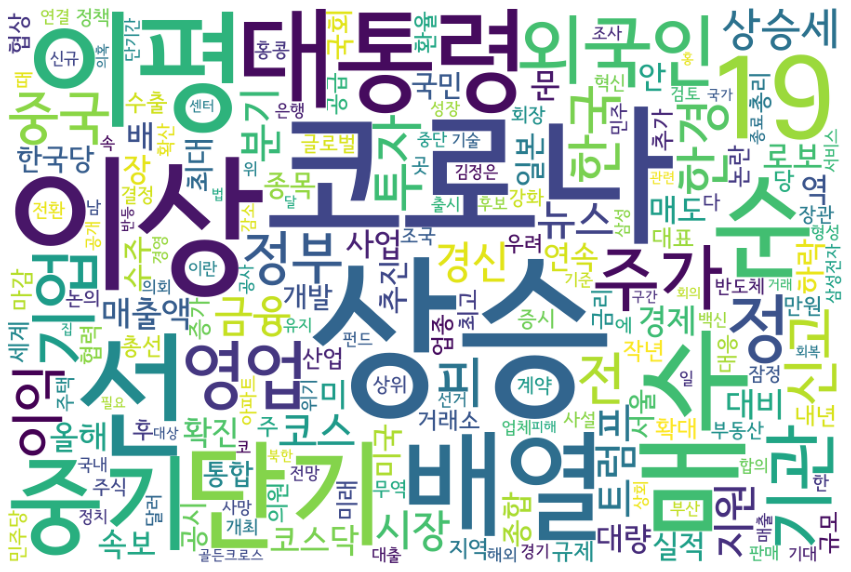

In [ ]:
plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(cloud)
# plt.show()
plt.savefig('/content/drive/MyDrive/Colab/BehavioralFinance/wordcloud.jpg')

## 감성분류

In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 3.95 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-11-23 15:48:37--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent,

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

###text_fin2 일때


In [ ]:
total_data1 = pd.read_csv('/content/drive/MyDrive/Colab/BehavioralFinance/text_fin2.csv', encoding='cp949')


In [ ]:
total_data1 = total_data1[['headline', 'date','field','label']]
total_data1

,headline,date,field,label
0,[뉴스의 맥] 세계 경제 10년 호황 종료…슈거 하이 효과가 사라진다,20190101,opinion,-1
1,[다산 칼럼] 개인과 기업의 자유 늘려야,20190101,opinion,-1
2,[사설] 5년 뒤 중국 첨단산업 더 무서워진다는 경고,20190101,opinion,-1
3,[사설] 김정은은 북한 비핵화하겠다는 의지 분명히 해야,20190101,opinion,-1
4,[사설] 소상공인들은 포용성장 대상 아닌가,20190101,opinion,-1
...,...,...,...,...
226037,"10일, 코스닥 외국인 순매도상위에 IT부품 업종 3종목",20210210,finance,1
226038,"뉴욕증시, 안정적 물가·기업 실적 양호 상승 출발",20210210,finance,1
226039,미국 1월 소비자물가 0.3%↑…석달 연속 상승,20210210,international,1
226040,설 민심 잡고 1위 굳히기?…이재명 연일 기본소득 설파,20210210,politics,1


In [ ]:
train_data, test_data = train_test_split(total_data1, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 169531
테스트용 리뷰의 개수 : 56511


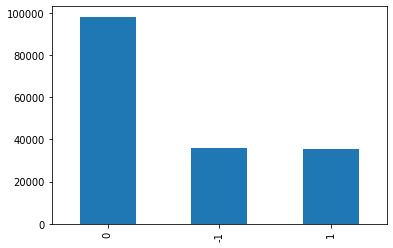

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')
plt.savefig('/content/drive/MyDrive/Colab/BehavioralFinance/text_fin2.png')

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0     -1  36013
1      0  98159
2      1  35359


###text_fin3 일때

In [ ]:
total_data = pd.read_csv('/content/drive/MyDrive/Colab/BehavioralFinance/text_fin3.csv', encoding='cp949')

In [ ]:
total_data = total_data[['headline', 'date','field','label']]
total_data

,headline,date,field,label
0,[뉴스의 맥] 세계 경제 10년 호황 종료…슈거 하이 효과가 사라진다,20190101,opinion,-1
1,[다산 칼럼] 개인과 기업의 자유 늘려야,20190101,opinion,-1
2,[사설] 5년 뒤 중국 첨단산업 더 무서워진다는 경고,20190101,opinion,-1
3,[사설] 김정은은 북한 비핵화하겠다는 의지 분명히 해야,20190101,opinion,-1
4,[사설] 소상공인들은 포용성장 대상 아닌가,20190101,opinion,-1
...,...,...,...,...
95357,"10일, 코스닥 외국인 순매도상위에 IT부품 업종 3종목",20210210,finance,1
95358,"뉴욕증시, 안정적 물가·기업 실적 양호 상승 출발",20210210,finance,1
95359,미국 1월 소비자물가 0.3%↑…석달 연속 상승,20210210,international,1
95360,설 민심 잡고 1위 굳히기?…이재명 연일 기본소득 설파,20210210,politics,1


## 훈련용, 테스트용 분류

In [ ]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 71521
테스트용 리뷰의 개수 : 23841


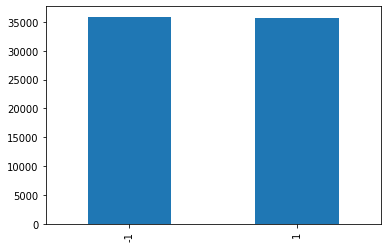

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')
plt.savefig('/content/drive/MyDrive/Colab/BehavioralFinance/text_fin3.png')

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0     -1  35914
1      1  35607


In [ ]:
train_data['headline'] = train_data['headline'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['headline'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


headline    0
date        0
field       0
label       0
dtype: int64


In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와','년','외국인', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면','로','주','선','열','명','종합','어','평','일','순','등','서','자','원','억']

In [ ]:
mecab = Mecab() 

train_data['tokenized'] = train_data['headline'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized'] = test_data['headline'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
negative_words = np.hstack(train_data[train_data.label == -1]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)
#neutral_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)

In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('코로나', 8921), ('신고', 3202), ('경신', 2781), ('확진', 2305), ('하락', 2102), ('논란', 1480), ('우려', 1395), ('나', 1282), ('중국', 1223), ('단기', 1158), ('코스피', 1155), ('사설', 1140), ('중기', 1118), ('적', 1111), ('한국', 1097), ('정배', 1046), ('중단', 1039), ('중', 1022), ('대', 1018), ('영업', 1016)]


In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('상승', 10870), ('이상', 7639), ('매수', 4389), ('단기', 3691), ('투자', 3229), ('중기', 3093), ('기관', 2693), ('지원', 2532), ('주가', 2500), ('위', 2363), ('한경', 2278), ('로보', 2149), ('뉴스', 2148), ('상승세', 2145), ('역배', 2019), ('정배', 1853), ('코스닥', 1778), ('에서', 1632), ('전일', 1596), ('순매도', 1527)]


In [ ]:
#neutral_word_count = Counter(neutral_words)
#print(neutral_word_count.most_common(20))

긍정 리뷰의 평균 길이 : 8.917403881259302
부정 리뷰의 평균 길이 : 9.096341259675892


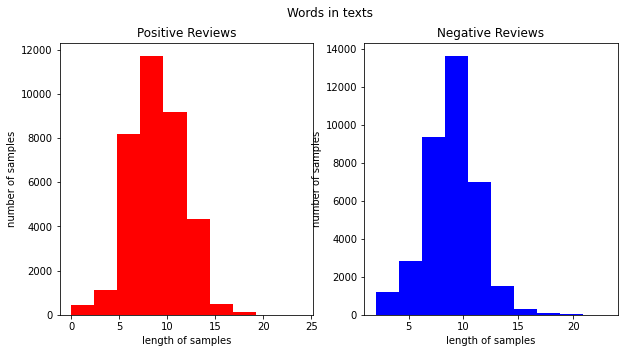

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==-1]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
#plt.show()
plt.savefig('/content/drive/MyDrive/Colab/BehavioralFinance/tone_len.png')

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 28443
등장 빈도가 1번 이하인 희귀 단어의 수: 10695
단어 집합에서 희귀 단어의 비율: 37.60151882712794
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.6601780791297223


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 17750


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[6, 1305, 55, 10, 15, 109, 21, 12, 1786, 13, 1385, 2945, 6, 7, 16], [11539, 1241, 1787, 808, 543, 30, 206, 1241, 60, 158, 75, 191, 185, 2434, 11], [11540, 350, 198, 236, 6, 7, 16, 12]]


In [ ]:
print(X_test[:3])

[[7836, 1, 10, 15, 1, 1, 1, 11074, 140, 8, 1971], [1, 1, 6412, 1547, 1, 5941, 83, 4192, 176, 1, 1, 393, 5386, 11881], [726, 1, 3, 1, 191, 1558, 52, 2632, 153, 1, 1746, 1358, 2112]]


헤드라인의 최대 길이 : 24
헤드라인의 평균 길이 : 9.00725660994673


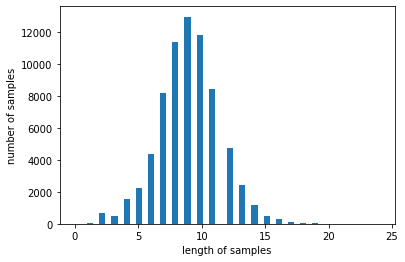

In [ ]:
print('헤드라인의 최대 길이 :',max(len(headline) for headline in X_train))
print('헤드라인의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(headline) for headline in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
#plt.show()
plt.savefig('/content/drive/MyDrive/Colab/BehavioralFinance/head_len.png')

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 20
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 20 이하인 샘플의 비율: 99.97483256665875


In [ ]:
# 잘라낼 문장의 위치
trunc_type='post'

# 채워줄 문장의 위치
padding_type='post'

In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len, truncating=trunc_type, padding=padding_type)
X_test = pad_sequences(X_test, maxlen=max_len, truncating=trunc_type, padding=padding_type)

In [ ]:
X_train.shape, X_test.shape

((71521, 20), (23841, 20))

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
embedding_dim = 16

## LSTM 모델

In [ ]:
import json
import tensorflow as tf
import numpy as np
import urllib

# 필요한 모듈 import
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model = Sequential([
    # 이곳에 모델링을 진행합니다.
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    # 마지막 출력층은 뉴런(노드)의 갯수를 1로 지정합니다.
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 16)            284000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 20, 128)          41472     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
model.compile(# 이곳에 코드를 입력합니다.
              optimizer='adam', loss='binary_crossentropy', metrics=['acc']
              )

In [ ]:
checkpoint_path = 'shkim_checkpoint.ckpt'
checkpoint = ModelCheckpoint(checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

In [ ]:
epochs=10

In [ ]:
# 이곳에 코드를 입력합니다.
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint],
                    epochs=epochs)

Epoch 1/10
2235/2236 [============================>.] - ETA: 0s - loss: -52075.2227 - acc: 0.4484
Epoch 1: val_loss improved from inf to -195380.67188, saving model to shkim_checkpoint.ckpt
2236/2236 [==============================] - 127s 52ms/step - loss: -52074.4922 - acc: 0.4484 - val_loss: -195380.6719 - val_acc: 0.4775
Epoch 2/10
2235/2236 [============================>.] - ETA: 0s - loss: -608465.3125 - acc: 0.4721
Epoch 2: val_loss improved from -195380.67188 to -1183225.75000, saving model to shkim_checkpoint.ckpt
2236/2236 [==============================] - 114s 51ms/step - loss: -608492.5000 - acc: 0.4721 - val_loss: -1183225.7500 - val_acc: 0.4702
Epoch 3/10
2236/2236 [==============================] - ETA: 0s - loss: -2097482.5000 - acc: 0.4752
Epoch 3: val_loss improved from -1183225.75000 to -3225809.75000, saving model to shkim_checkpoint.ckpt
2236/2236 [==============================] - 121s 54ms/step - loss: -2097482.5000 - acc: 0.4752 - val_loss: -3225809.7500 - val_

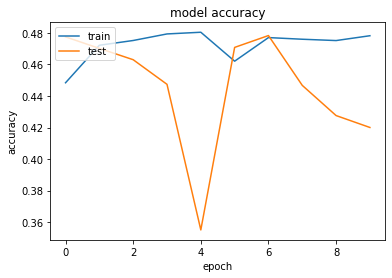

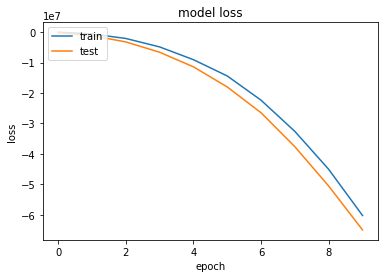

In [ ]:
import matplotlib.pyplot as plt

# list all data in history
#print(history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## BiLSTM 모델

In [ ]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 64

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units))) # Bidirectional LSTM을 사용
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size=128)

Epoch 1/30
559/559 [==============================] - ETA: 0s - loss: -137.0273 - acc: 0.3897

559/559 [==============================] - 55s 90ms/step - loss: -137.0273 - acc: 0.3897
Epoch 2/30
559/559 [==============================] - ETA: 0s - loss: -775.4158 - acc: 0.4700

559/559 [==============================] - 52s 93ms/step - loss: -775.4158 - acc: 0.4700
Epoch 3/30
559/559 [==============================] - ETA: 0s - loss: -1930.3591 - acc: 0.4826

559/559 [==============================] - 50s 90ms/step - loss: -1930.3591 - acc: 0.4826
Epoch 4/30
559/559 [==============================] - ETA: 0s - loss: -3523.9946 - acc: 0.4854

559/559 [==============================] - 50s 90ms/step - loss: -3523.9946 - acc: 0.4854
Epoch 5/30
559/559 [==============================] - ETA: 0s - loss: -5490.1147 - acc: 0.4857

559/559 [==============================] - 50s 90ms/step - loss: -5490.1147 - acc: 0.4857
Epoch 6/30
559/559 [==============================] - ETA: 0s - loss: -7822.9995 - acc: 0.4881

559/559 [==============================] - 55s 99ms/step - loss: -7822.9995 - acc: 0.4881
Epoch 7/30
559/559 [==============================] - ETA: 0s - loss: -10447.8193 - acc: 0.4904

559/559 [==============================] - 50s 90ms/step - loss: -10447.8193 - acc: 0.4904
Epoch 8/30
559/559 [==============================] - ETA: 0s - loss: -13421.3350 - acc: 0.4922

559/559 [==============================] - 51s 91ms/step - loss: -13421.3350 - acc: 0.4922
Epoch 9/30
559/559 [==============================] - ETA: 0s - loss: -16670.9023 - acc: 0.4929

559/559 [==============================] - 50s 89ms/step - loss: -16670.9023 - acc: 0.4929
Epoch 10/30
559/559 [==============================] - ETA: 0s - loss: -20212.3242 - acc: 0.4938

559/559 [==============================] - 50s 90ms/step - loss: -20212.3242 - acc: 0.4938
Epoch 11/30
559/559 [==============================] - ETA: 0s - loss: -23943.5566 - acc: 0.4928

559/559 [==============================] - 50s 90ms/step - loss: -23943.5566 - acc: 0.4928
Epoch 12/30
559/559 [==============================] - ETA: 0s - loss: -27800.5684 - acc: 0.4870

559/559 [==============================] - 50s 90ms/step - loss: -27800.5684 - acc: 0.4870
Epoch 13/30
559/559 [==============================] - ETA: 0s - loss: -32338.3574 - acc: 0.4939

559/559 [==============================] - 50s 90ms/step - loss: -32338.3574 - acc: 0.4939
Epoch 14/30
559/559 [==============================] - ETA: 0s - loss: -36873.5859 - acc: 0.4934

559/559 [==============================] - 51s 90ms/step - loss: -36873.5859 - acc: 0.4934
Epoch 15/30
559/559 [==============================] - ETA: 0s - loss: -41794.1914 - acc: 0.4944

559/559 [==============================] - 50s 90ms/step - loss: -41794.1914 - acc: 0.4944
Epoch 16/30
559/559 [==============================] - ETA: 0s - loss: -46854.5195 - acc: 0.4938

559/559 [==============================] - 50s 90ms/step - loss: -46854.5195 - acc: 0.4938
Epoch 17/30
559/559 [==============================] - ETA: 0s - loss: -52036.4414 - acc: 0.4905

559/559 [==============================] - 50s 90ms/step - loss: -52036.4414 - acc: 0.4905
Epoch 18/30
559/559 [==============================] - ETA: 0s - loss: -57783.5664 - acc: 0.4937

559/559 [==============================] - 50s 90ms/step - loss: -57783.5664 - acc: 0.4937
Epoch 19/30
559/559 [==============================] - ETA: 0s - loss: -63814.8555 - acc: 0.4945

559/559 [==============================] - 50s 90ms/step - loss: -63814.8555 - acc: 0.4945
Epoch 20/30
559/559 [==============================] - ETA: 0s - loss: -69930.0156 - acc: 0.4945

559/559 [==============================] - 50s 90ms/step - loss: -69930.0156 - acc: 0.4945
Epoch 21/30
559/559 [==============================] - ETA: 0s - loss: -76265.9688 - acc: 0.4936

559/559 [==============================] - 50s 90ms/step - loss: -76265.9688 - acc: 0.4936
Epoch 22/30
559/559 [==============================] - ETA: 0s - loss: -82664.6953 - acc: 0.4906

559/559 [==============================] - 50s 90ms/step - loss: -82664.6953 - acc: 0.4906
Epoch 23/30
559/559 [==============================] - ETA: 0s - loss: -89759.8594 - acc: 0.4921

559/559 [==============================] - 50s 90ms/step - loss: -89759.8594 - acc: 0.4921
Epoch 24/30
559/559 [==============================] - ETA: 0s - loss: -97044.8125 - acc: 0.4928

559/559 [==============================] - 50s 90ms/step - loss: -97044.8125 - acc: 0.4928
Epoch 25/30
559/559 [==============================] - ETA: 0s - loss: -104593.3828 - acc: 0.4948

559/559 [==============================] - 51s 90ms/step - loss: -104593.3828 - acc: 0.4948
Epoch 26/30
559/559 [==============================] - ETA: 0s - loss: -112119.4922 - acc: 0.4936

559/559 [==============================] - 50s 90ms/step - loss: -112119.4922 - acc: 0.4936
Epoch 27/30
559/559 [==============================] - ETA: 0s - loss: -119859.9844 - acc: 0.4930

559/559 [==============================] - 50s 90ms/step - loss: -119859.9844 - acc: 0.4930
Epoch 28/30
559/559 [==============================] - ETA: 0s - loss: -127933.2109 - acc: 0.4931

559/559 [==============================] - 50s 90ms/step - loss: -127933.2109 - acc: 0.4931
Epoch 29/30
559/559 [==============================] - ETA: 0s - loss: -136783.3906 - acc: 0.4951

559/559 [==============================] - 50s 90ms/step - loss: -136783.3906 - acc: 0.4951
Epoch 30/30
559/559 [==============================] - ETA: 0s - loss: -145319.4062 - acc: 0.4940

559/559 [==============================] - 51s 91ms/step - loss: -145319.4062 - acc: 0.4940


In [ ]:
loaded_model = load_model('/content/drive/MyDrive/Colab/BehavioralFinance/best_model-1.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

746/746 [==============================] - 4s 4ms/step - loss: -77983452758016.0000 - acc: 0.0830
테스트 정확도: 0.0830


KeyError: ignored

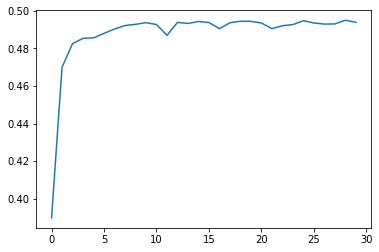

In [ ]:
import matplotlib.pyplot as plt

# list all data in history
#print(history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab/BehavioralFinance/BiLSTM_acc.png')

# summarize history for loss0
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/content/drive/MyDrive/Colab/BehavioralFinance/BiLSTM_loss.png')

##CNN 으로 돌리기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

embedding_dim = 256 # 임베딩 벡터의 차원
dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 256 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/20
2236/2236 [==============================] - ETA: 0s - loss: -56256700.0000 - acc: 0.0853
Epoch 1: val_acc improved from -inf to 0.09547, saving model to best_model.h5
2236/2236 [==============================] - 199s 89ms/step - loss: -56256700.0000 - acc: 0.0853 - val_loss: -252700880.0000 - val_acc: 0.0955
Epoch 2/20
2236/2236 [==============================] - ETA: 0s - loss: -1129724160.0000 - acc: 0.0852
Epoch 2: val_acc improved from 0.09547 to 0.12114, saving model to best_model.h5
2236/2236 [==============================] - 195s 87ms/step - loss: -1129724160.0000 - acc: 0.0852 - val_loss: -2468706304.0000 - val_acc: 0.1211
Epoch 3/20
2236/2236 [==============================] - ETA: 0s - loss: -5359151616.0000 - acc: 0.0890
Epoch 3: val_acc improved from 0.12114 to 0.12122, saving model to best_model.h5
2236/2236 [==============================] - 192s 86ms/step - loss: -5359151616.0000 - acc: 0.0890 - val_loss: -8910977024.0000 - val_acc: 0.1212
Epoch 4/20
2235/22

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

746/746 [==============================] - 6s 8ms/step - loss: -3233717944320.0000 - acc: 0.1479

 테스트 정확도: 0.1479


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, epochs+1), history.history['acc'])
plt.plot(np.arange(1, epochs+1), history.history['loss'])
plt.title('Acc / Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc / Loss')
plt.legend(['acc', 'loss'], fontsize=15)
plt.show()


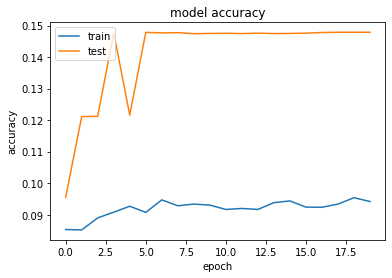

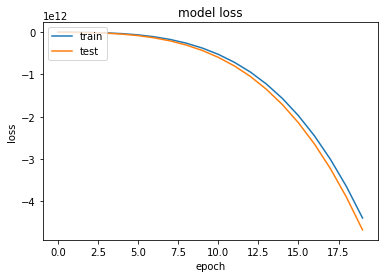

In [ ]:
import matplotlib.pyplot as plt

# list all data in history
#print(history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## BERT 모델

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
import warnings
warnings.filterwarnings('ignore')
 
#토크나이저 불러오기
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
 
#모델 불러오기 
model = TFBertModel.from_pretrained("bert-base-multilingual-cased", output_hidden_states = True)


Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
def encode(sents, tokenizer):
    input_ids = []
    attention_mask = []
 
    for text in sents:
        tokenized_text = tokenizer.encode_plus(text,
                                            max_length=20,
                                            add_special_tokens = True,
                                            pad_to_max_length=True,
                                            return_attention_mask=True)
        
        input_ids.append(tokenized_text['input_ids'])
        attention_mask.append(tokenized_text['attention_mask'])
    return tf.convert_to_tensor(input_ids, dtype=tf.int32), tf.convert_to_tensor(attention_mask, dtype=tf.int32)

In [ ]:
texts = pd.read_csv('/content/drive/MyDrive/Colab/BehavioralFinance/text_fin3.csv', encoding='cp949')

In [ ]:
texts = texts[['headline','label']]

In [ ]:
texts_list = texts.values.tolist()
texts_list

[['[뉴스의 맥] 세계 경제 10년 호황 종료…슈거 하이 효과가 사라진다', -1],
 ['[다산 칼럼] 개인과 기업의 자유 늘려야', -1],
 ['[사설] 5년 뒤 중국 첨단산업 더 무서워진다는 경고', -1],
 ['[사설] 김정은은 북한 비핵화하겠다는 의지 분명히 해야', -1],
 ['[사설] 소상공인들은 포용성장 대상 아닌가', -1],
 ['[시론] 달라진 것 없는 北核, 안보 빗장 풀어선 안돼', -1],
 ['[도전 2019 다시 뛰는 기업들] 커피 프랜차이즈 업체 A사 지분 100% 매각', -1],
 ['국제유가 연간 20%대 하락…경기둔화·공급과잉에 짓눌려', -1],
 ['국제유가, 연간 20%대 뚝…글로벌 경기둔화·원유 공급과잉 우려', -1],
 ['기막힌 현실…전체 급여 중 기본급 비중 40% 미만, 연봉 5000만원도 최저임금 위반 속출', -1],
 ['기재부 前사무관, 적자국채 강요 SNS대화 증거 제시', -1],
 ['기재부 직무상 비밀누설 신재민 前사무관 2일 검찰고발', -1],
 ['기재부 차관보, 靑 강압에 적자국채 발행 지시', -1],
 ['勞편향 논란 커지는데…사안마다 칼자루 쥔 경사노위', -1],
 ['뉴욕증시, 2018 마지막날 다우 1.15% 상승 마감 불구 10년만에 수익률 최악', -1],
 ['뉴욕증시, 최악기록 속출…마지막 거래일 다우 1.15% 상승 마감', -1],
 ['러 우랄 아파트 붕괴사고 사망자 7명으로 늘어…30여명 매몰', -1],
 ['마크롱 개혁 중단 없다…노란 조끼 정면돌파 선언', -1],
 ['신재민 靑, 적자국채 발행 지시 vs 기재부 치열한 토론 결과 진실은', -1],
 ['쓰나미 이어 산사태까지…인니, 30가구 파묻혀 15명 사망', -1],
 ['아베, 레이더 갈등에 화기관제 레이더 겨냥 위험한 행위 주장', -1],
 ['우려불식 vs 핵보유국논리…김정은 핵무기 4불 언급 주목', -1],
 ['자영업자 체감경기 최악…작년 역대 최대폭 하락', -1],
 ['정

In [ ]:
texts_list = [item.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") for item in texts_list]

AttributeError: ignored

In [ ]:
tokenized_sents = encode(texts_list, tokenizer)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
for layer in model.layers:
    layer.trainable=False

In [ ]:
outputs = model(tokenized_sents[0], attention_mask = tokenized_sents[1])
 
outputs[2][-1].shape

## ACC, Epoch 그림

In [ ]:
import matplotlib.pyplot as plt

# list all data in history
print(history.keys())

# summarize history for accuracy
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()